<a href="https://colab.research.google.com/github/Kovidk/DS-Unsupervised-ML-Zomato-Restaurant-Clustering-and-Sentiment-Analysis/blob/main/ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Zomato Restaurant Clustering and Sentiment Analysis

##### **Project Type**    - Unsupervised Machine Learning
##### **Contribution**    - Individual
##### **Team Member 1 -Kovid Krishnan**
##### **Team Member 2 - NA**
##### **Team Member 3 - NA**
##### **Team Member 4 - NA**

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.

# **GitHub Link -**

***Repository Link***:- https://github.com/Kovidk/DS-Unsupervised-ML-Zomato-Restaurant-Clustering-and-Sentiment-Analysis

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

## **Importing Libraries**

In [4]:
#importing all the important librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


## **Mounting Google Drive**

In [5]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing Dataset From Drive**

In [6]:
# Import the Dataset
meta_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort London/Project/Zomato Restaurant names and Metadata.csv')
reviews_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort London/Project/Zomato Restaurant reviews.csv')

# **1. Meta Data**

In [7]:
# Display the first few rows of the DataFrame 'meta_df'.
meta_df.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [8]:
# Display the Last few rows of the DataFrame 'meta_df'.
meta_df.tail()

Name  \
100                               IndiBlaze   
101                            Sweet Basket   
102                        Angaara Counts 3   
103                             Wich Please   
104  Republic Of Noodles - Lemon Tree Hotel   

                                                 Links   Cost  \
100  https://www.zomato.com/hyderabad/indiblaze-gac...    600   
101  https://www.zomato.com/hyderabad/sweet-basket-...    200   
102  https://www.zomato.com/hyderabad/angaara-count...    500   
103  https://www.zomato.com/hyderabad/wich-please-1...    250   
104  https://www.zomato.com/hyderabad/republic-of-n...  1,700   

              Collections                         Cuisines  \
100                   NaN                 Fast Food, Salad   
101                   NaN                   Bakery, Mithai   
102                   NaN   North Indian, Biryani, Chinese   
103                   NaN                        Fast Food   
104  Pan-Asian Delicacies  Thai, Asian, Chinese, Malaysian   

                                               Timings  
100                                     11 AM to 11 PM  
101  10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...  
102                                   12 Noon to 11 PM  
103                           8am to 12:30AM (Mon-Sun)  
104              11:30 AM to 3 PM, 7 PM to 12 Midnight

In [9]:
# Display the shape of the dataset
meta_df.shape

(105, 6)

We have 106 rows and 6 columns.

In [10]:
# Display the Dataset Information
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [11]:
# Creating a copy of the DataFrame
meta_df_1= meta_df.copy()

We have some Null values in Collections and 1 null in Timings.

### Let's Drop Unnecessary Columns.

In [12]:
#dropping unneccesary column
meta_df_1 = meta_df_1.drop(['Links', 'Timings'],axis = 1)
meta_df_1.head()

Name   Cost  \
0                 Beyond Flavours    800   
1                        Paradise    800   
2                        Flechazo  1,300   
3  Shah Ghouse Hotel & Restaurant    800   
4      Over The Moon Brew Company  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  
0  Chinese, Continental, Kebab, European, South I...  
1                     Biryani, North Indian, Chinese  
2       Asian, Mediterranean, North Indian, Desserts  
3  Biryani, North Indian, Chinese, Seafood, Bever...  
4  Asian, Continental, North Indian, Chinese, Med...

### Now let's handle Null Values.

In [13]:
# Check Null value count
meta_df_1.isnull().sum()

Name            0
Cost            0
Collections    54
Cuisines        0
dtype: int64

54 Null values in Collections.

In [14]:
# replacing nan values
meta_df_1['Collections'] = meta_df_1['Collections'].replace(np.nan , "Unknown", regex=True)

In [15]:
# Check Null value count
meta_df_1.isnull().sum()

Name           0
Cost           0
Collections    0
Cuisines       0
dtype: int64

We have removed all null values.

In [16]:
# Check the dataFrame Information
meta_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Cost         105 non-null    object
 2   Collections  105 non-null    object
 3   Cuisines     105 non-null    object
dtypes: object(4)
memory usage: 3.4+ KB


Here we can see our Cost Column is of type Object let's check it.

In [17]:
# Count the occurrences of each unique value in the 'Cost' column of the DataFrame 'meta_df_1'.
meta_df_1['Cost'].value_counts()

500      13
600      10
700       8
1,200     7
400       6
1,000     6
200       5
800       5
1,500     5
1,300     4
350       3
1,600     3
750       3
550       3
900       3
1,100     3
1,700     2
150       2
1,400     2
450       2
1,900     2
300       1
2,500     1
850       1
650       1
1,800     1
2,800     1
1,750     1
250       1
Name: Cost, dtype: int64

In [18]:
# changing the data type of the cost function
meta_df_1['Cost'] = meta_df_1['Cost'].str.replace(",","").astype('int64')

In [19]:
# Retrieve the unique values in the 'Cost' column of the DataFrame 'meta_df_1'.
meta_df_1['Cost'].unique()

array([ 800, 1300, 1200, 1500,  500,  300, 1000,  350,  400, 1600,  750,
        550, 1900,  450,  150, 1400, 1100,  600,  200,  900,  700, 1700,
       2500,  850,  650, 1800, 2800, 1750,  250])

In [20]:
# Check the dataFrame Information
meta_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Cost         105 non-null    int64 
 2   Collections  105 non-null    object
 3   Cuisines     105 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.4+ KB


We have converted Cost column to integer.

### **EDA**

### Top 10 Most Expensive Restruant.

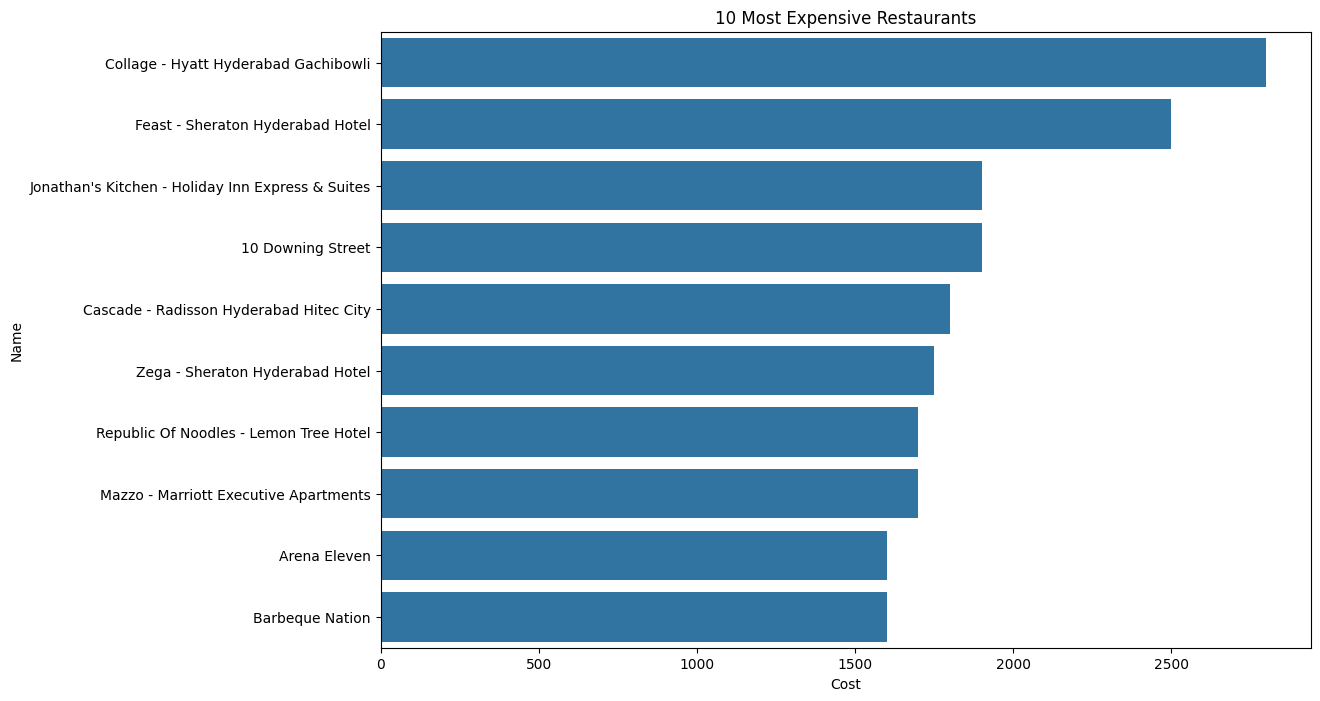

In [21]:
# Set the size of the plot figure to 12x8 inches.
plt.figure(figsize=(12, 8))

# Create a bar plot showing the top 10 most expensive restaurants.
# Data is sorted by 'Cost' in descending order, and only the top 10 records are considered.
sns.barplot(x='Cost', y='Name', data=meta_df_1.sort_values(by='Cost', ascending=False)[:10])

# Set the title of the plot.
plt.title('10 Most Expensive Restaurants')

# Display the plot.
plt.show()

### Top 10 Cheapest Resturants.

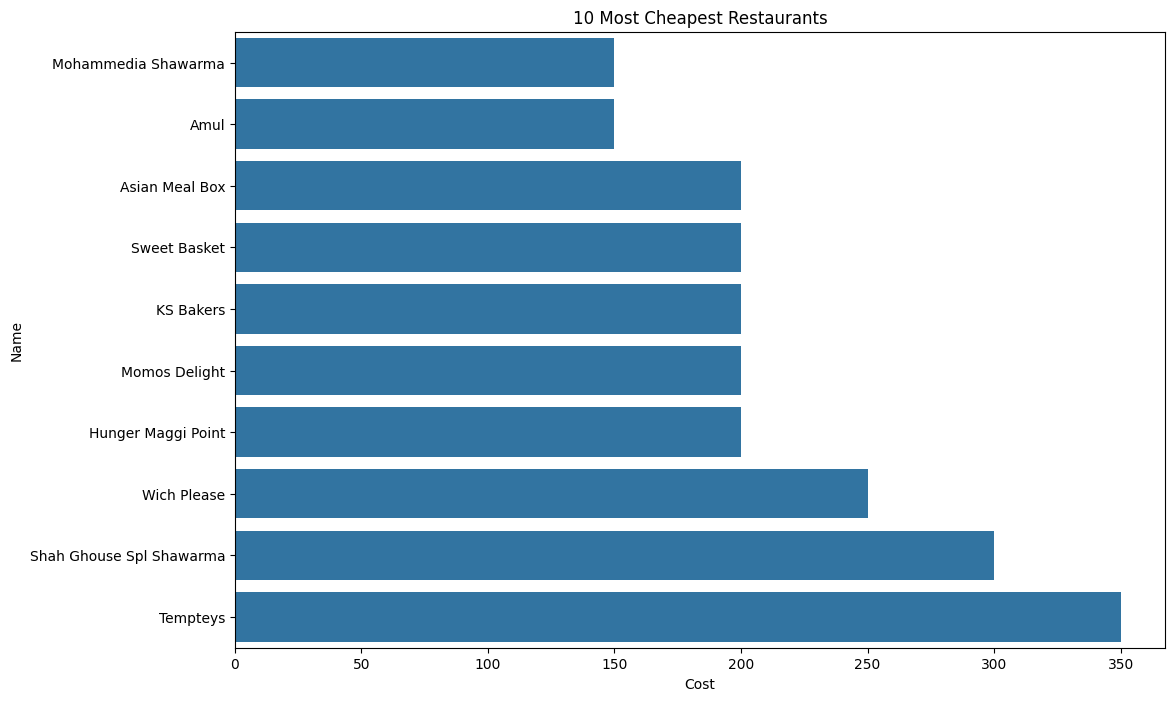

In [22]:
# Set the size of the plot figure to 12x8 inches.
plt.figure(figsize=(12, 8))

# Create a bar plot showing the 10 least expensive restaurants.
# Data is sorted by 'Cost' in ascending order, and only the bottom 10 records are considered.
sns.barplot(x='Cost', y='Name', data=meta_df_1.sort_values(by='Cost')[:10])

# Set the title of the plot.
plt.title('10 Most Cheapest Restaurants')

# Display the plot.
plt.show()

### Most Popular Cuisines.

In [23]:
# Display the first few rows of the DataFrame 'meta_df_1'.
meta_df_1.head()

Name  Cost  \
0                 Beyond Flavours   800   
1                        Paradise   800   
2                        Flechazo  1300   
3  Shah Ghouse Hotel & Restaurant   800   
4      Over The Moon Brew Company  1200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  
0  Chinese, Continental, Kebab, European, South I...  
1                     Biryani, North Indian, Chinese  
2       Asian, Mediterranean, North Indian, Desserts  
3  Biryani, North Indian, Chinese, Seafood, Bever...  
4  Asian, Continental, North Indian, Chinese, Med...

In [24]:
# For loops to extract every single Cuisine name.
cuisine_list = meta_df_1.Cuisines.str.split(', ')
cuisine_ = []
for names in cuisine_list:
  for name in names:
    cuisine_.append(name)


In [25]:
# Create a DataFrame 'cuisine_df' from the list of cuisines 'cuisine_'.
# The DataFrame has columns named 'Cuisines' and their corresponding counts in the 'Count' column.
cuisine_df = pd.DataFrame(cuisine_, columns=['Cuisines']).value_counts().reset_index(name='Count')

# Display the first few rows of the DataFrame 'cuisine_df'.
cuisine_df.head()

Cuisines  Count
0  North Indian     61
1       Chinese     43
2   Continental     21
3       Biryani     16
4         Asian     15

In [26]:
# Display the shape (number of rows and columns) of the DataFrame 'cuisine_df'.
cuisine_df.shape

(44, 2)

Text(0.5, 1.0, 'Most popular cuisines at Restaurants')

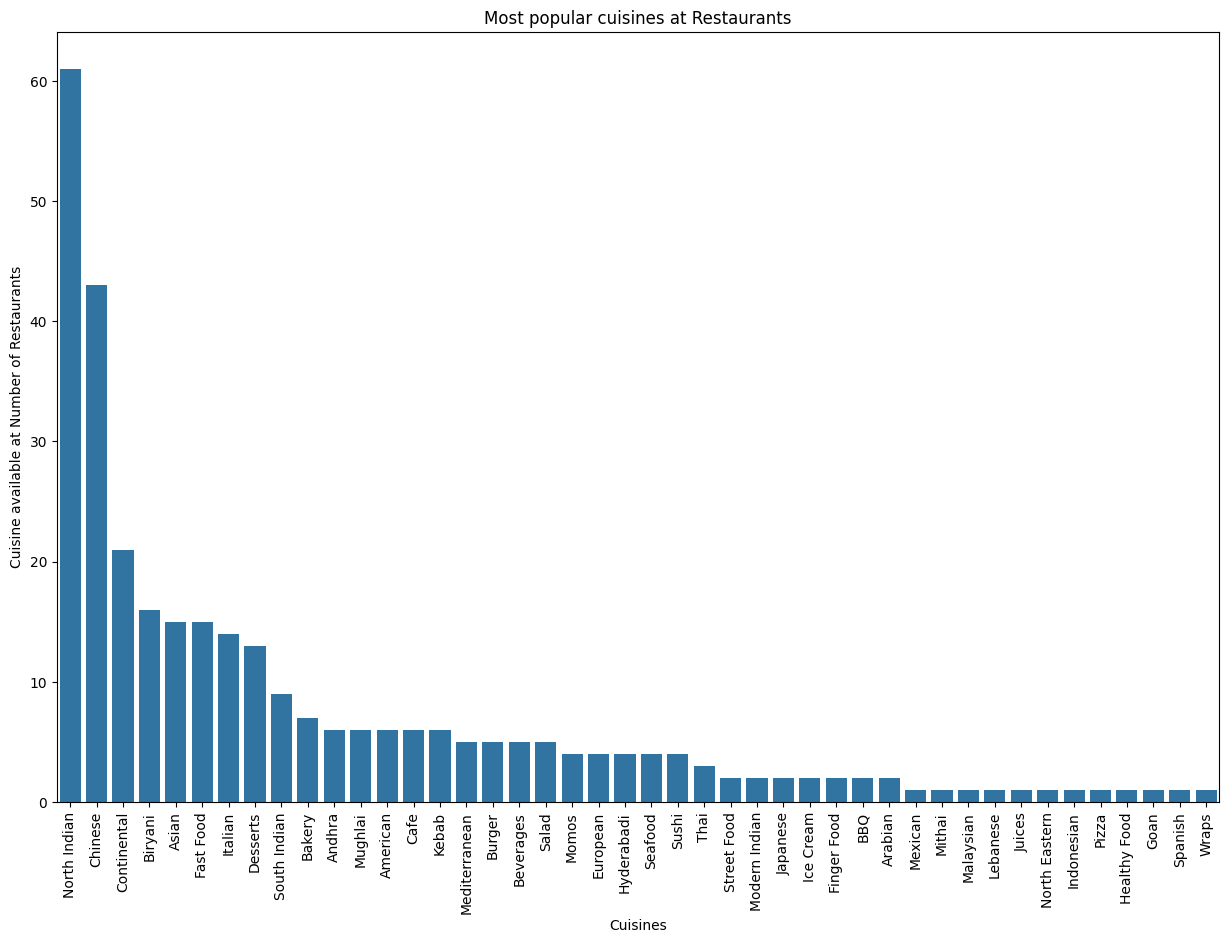

In [27]:
# Plot of Cuisines in Resturants.
plt.figure(figsize=[15,10])
sns.barplot(data=cuisine_df, x='Cuisines', y= 'Count')
plt.xlabel('Cuisines')
plt.xticks(rotation=90)
plt.ylabel('Cuisine available at Number of Restaurants')
plt.title('Most popular cuisines at Restaurants')

Observation:

1.   North Indian, Chinese, Continental are the Most popular Cuisine available at most  Resturants.
2.   Goan, Spanish, Wraps are the least popular Cuisines.



### Top Collections.

In [28]:
# Count the occurrences of each unique value in the 'Collections' column of the DataFrame 'meta_df_1'.
# Store the result in a new DataFrame 'collections'.
collections = meta_df_1['Collections'].value_counts().reset_index()

# Display the first few rows of the DataFrame 'collections'.
collections.head()

index  Collections
0                                      Unknown           54
1  Food Hygiene Rated Restaurants in Hyderabad            4
2                                Great Buffets            2
3                                  New on Gold            2
4                          Hyderabad's Hottest            2

In [29]:
# Rename the columns 'index' to 'Collection' and 'Collections' to 'Count' in the DataFrame 'collections'.
collections.rename(columns={'index': 'Collection', 'Collections': 'Count'}, inplace=True)

# Display the first few rows of the DataFrame 'collections' after renaming columns.
collections.head()

Collection  Count
0                                      Unknown     54
1  Food Hygiene Rated Restaurants in Hyderabad      4
2                                Great Buffets      2
3                                  New on Gold      2
4                          Hyderabad's Hottest      2

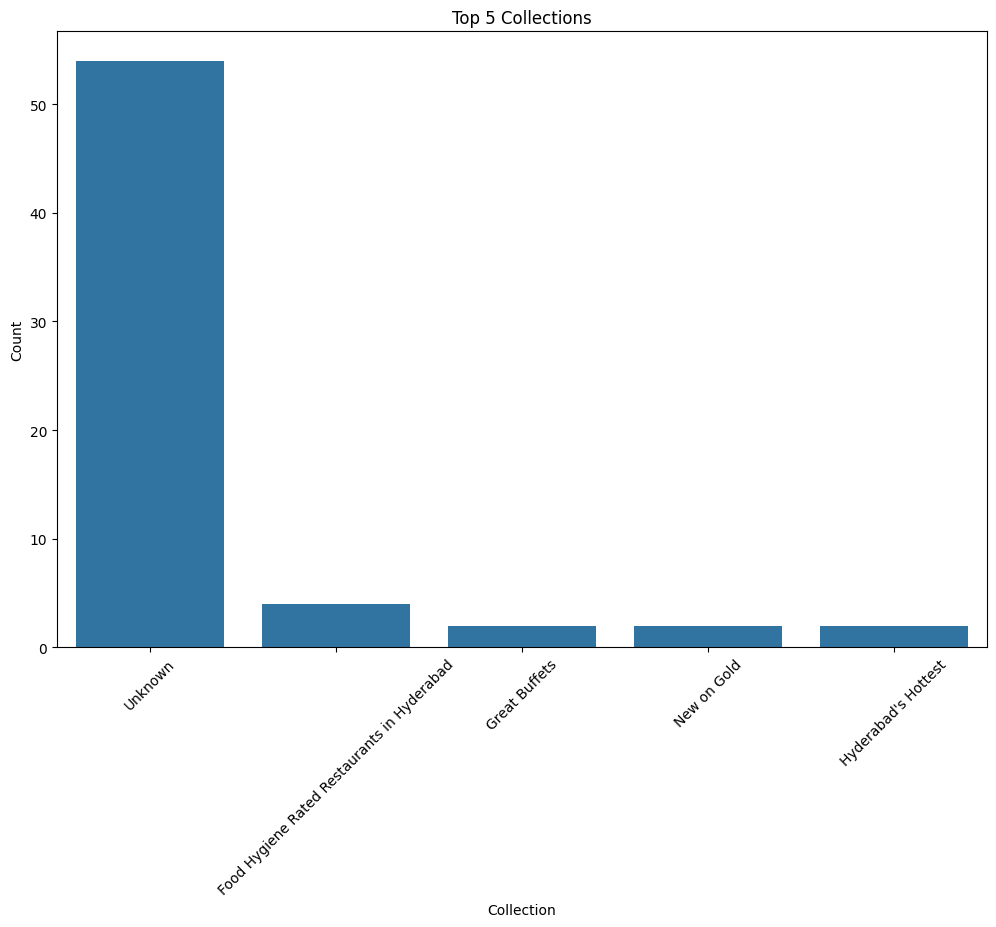

In [30]:
# Top 5 collections
plt.figure(figsize = (12,8))
sns.barplot(x='Collection', y='Count', data=collections.sort_values(ascending=False, by='Count')[:5] )
plt.xticks(rotation = 45)
plt.title('Top 5 Collections')
plt.show()

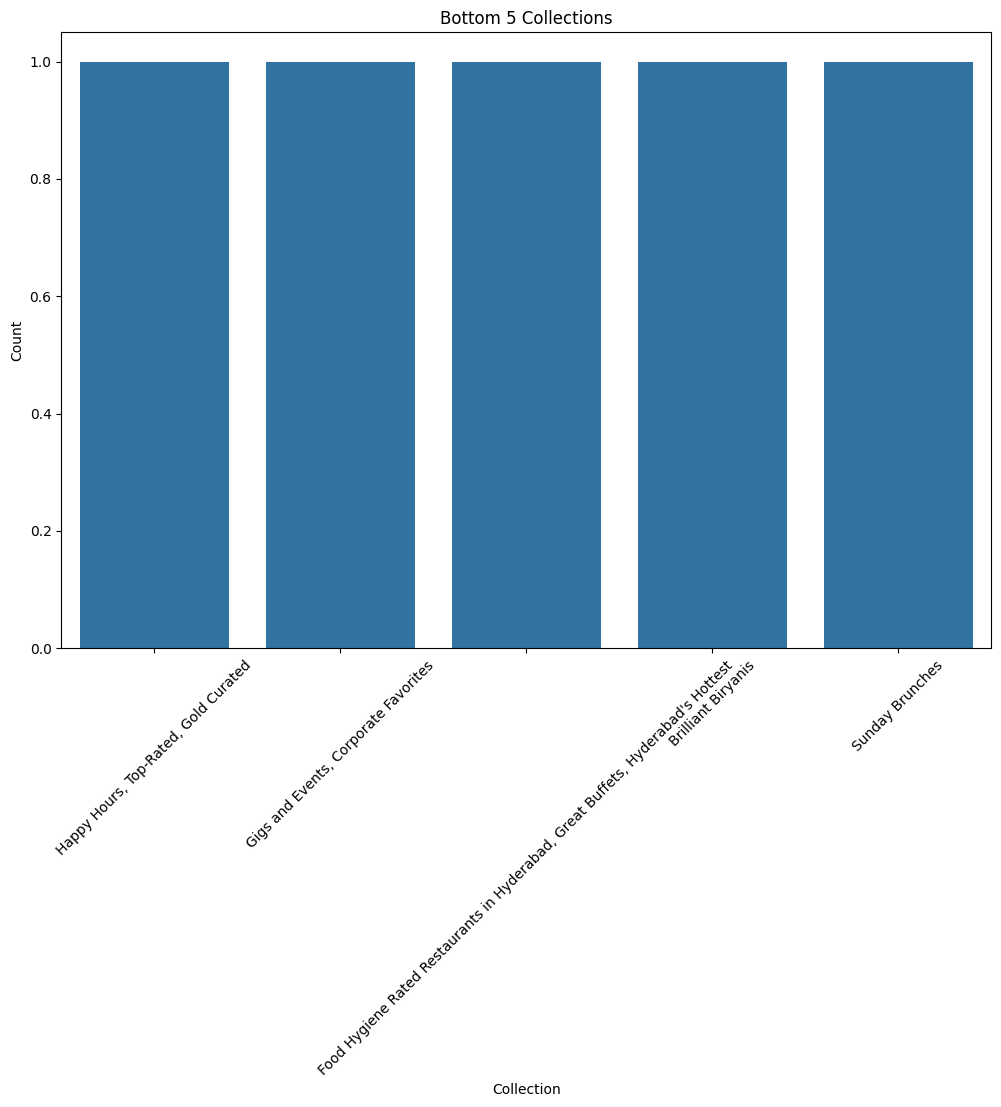

In [31]:
# Bottom 5 collections
plt.figure(figsize = (12,8))
sns.barplot(x='Collection', y='Count', data=collections.sort_values(ascending=False, by='Count')[-5:])
plt.xticks(rotation=45)
plt.title('Bottom 5 Collections')
plt.show()

# **Clustering on  Meta Data**



In [32]:
# Display the first few rows of the DataFrame 'meta_df'.
meta_df.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [33]:
# Create a copy of the DataFrame 'meta_df' and store it in a new DataFrame 'clustering_df'.
clustering_df = meta_df.copy()

In [34]:
# Remove the 'Links' column from the DataFrame 'clustering_df'.
clustering_df.drop(['Links'], axis=1, inplace=True)

In [35]:
# Display the DataFrame
clustering_df

Name   Cost  \
0                           Beyond Flavours    800   
1                                  Paradise    800   
2                                  Flechazo  1,300   
3            Shah Ghouse Hotel & Restaurant    800   
4                Over The Moon Brew Company  1,200   
..                                      ...    ...   
100                               IndiBlaze    600   
101                            Sweet Basket    200   
102                        Angaara Counts 3    500   
103                             Wich Please    250   
104  Republic Of Noodles - Lemon Tree Hotel  1,700   

                                           Collections  \
0    Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                  Hyderabad's Hottest   
2                   Great Buffets, Hyderabad's Hottest   
3                               Late Night Restaurants   
4    Best Bars & Pubs, Food Hygiene Rated Restauran...   
..                                                 ...   
100                                                NaN   
101                                                NaN   
102                                                NaN   
103                                                NaN   
104                               Pan-Asian Delicacies   

                                              Cuisines  \
0    Chinese, Continental, Kebab, European, South I...   
1                       Biryani, North Indian, Chinese   
2         Asian, Mediterranean, North Indian, Desserts   
3    Biryani, North Indian, Chinese, Seafood, Bever...   
4    Asian, Continental, North Indian, Chinese, Med...   
..                                                 ...   
100                                   Fast Food, Salad   
101                                     Bakery, Mithai   
102                     North Indian, Biryani, Chinese   
103                                          Fast Food   
104                    Thai, Asian, Chinese, Malaysian   

                                               Timings  
0        12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                       11 AM to 11 PM  
2                11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                      12 Noon to 2 AM  
4    12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...  
..                                                 ...  
100                                     11 AM to 11 PM  
101  10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...  
102                                   12 Noon to 11 PM  
103                           8am to 12:30AM (Mon-Sun)  
104              11:30 AM to 3 PM, 7 PM to 12 Midnight  

[105 rows x 5 columns]

In [36]:
# Count the occurrences of each unique value in the 'Cost' column of the DataFrame 'clustering_df'.
clustering_df['Cost'].value_counts()

500      13
600      10
700       8
1,200     7
400       6
1,000     6
200       5
800       5
1,500     5
1,300     4
350       3
1,600     3
750       3
550       3
900       3
1,100     3
1,700     2
150       2
1,400     2
450       2
1,900     2
300       1
2,500     1
850       1
650       1
1,800     1
2,800     1
1,750     1
250       1
Name: Cost, dtype: int64

In [37]:
# changing the data type of the cost function
clustering_df['Cost'] = clustering_df['Cost'].str.replace(",","").astype('int64')

In [38]:
# Retrieve the unique values in the 'Cost' column of the DataFrame 'clustering_df'.
clustering_df['Cost'].unique()

array([ 800, 1300, 1200, 1500,  500,  300, 1000,  350,  400, 1600,  750,
        550, 1900,  450,  150, 1400, 1100,  600,  200,  900,  700, 1700,
       2500,  850,  650, 1800, 2800, 1750,  250])

<!-- [-p̂t;.5.PL### Merging the two dataframes SO that we can add the average ratings of the restaurants also. -->

In [39]:
# Display the first few rows of the DataFrame 'reviews_df'.
reviews_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

In [40]:
# Create a copy of the DataFrame 'reviews_df' and store it in a new DataFrame 'review_df'.
review_df = reviews_df.copy()

In [41]:
# Count the occurrences of each unique value in the 'Rating' column of the DataFrame 'review_df'.
review_df['Rating'].value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [42]:
# Display the dataframe information
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [43]:
# Count the unique values of the Rating DataFrame
review_df['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like', nan],
      dtype=object)

In [44]:
# Remove nan rating in Rating column
review_df.dropna(subset=['Rating'],inplace=True)

There is one Rating in str which is Like lets replace it with 4.

In [45]:
# Replace the string 'Like' with the integer '4' in the 'Rating' column of the DataFrame 'review_df'.
review_df['Rating'] = review_df['Rating'].replace('Like', '4')

In [46]:
# Changing data type of rating column to float.
review_df['Rating']= review_df['Rating'].astype('float')

Creating a new df to get the average ratings for each Restaurant.

In [47]:
# Group the DataFrame 'review_df' by the 'Restaurant' column and calculate the mean of the 'Rating' column for each group.
# Store the result in a new DataFrame 'ratings_df'.
ratings_df = review_df.groupby('Restaurant')['Rating'].mean().reset_index()

In [48]:
# Sort the DataFrame 'ratings_df' by the 'Rating' column in descending order.
# Display the top 10 rows.
ratings_df.sort_values(by='Rating', ascending=False).head(10)

Restaurant  Rating
3                 AB's - Absolute Barbecues    4.88
11                                   B-Dubs    4.81
2            3B's - Buddies, Bar & Barbecue    4.76
67                                 Paradise    4.70
35                                 Flechazo    4.66
87                           The Indi Grill    4.60
97          Zega - Sheraton Hyderabad Hotel    4.45
64               Over The Moon Brew Company    4.34
16                          Beyond Flavours    4.28
19  Cascade - Radisson Hyderabad Hitec City    4.26

In [49]:
# Merge the DataFrames 'clustering_df' and 'ratings_df' using the 'Name' column from 'clustering_df' and the 'Restaurant' column from 'ratings_df'.
# Store the result in a new DataFrame 'df_cluster'.
df_cluster = clustering_df.merge(ratings_df, left_on='Name', right_on='Restaurant')
df_cluster

Name  Cost  \
0                   Beyond Flavours   800   
1                          Paradise   800   
2                          Flechazo  1300   
3    Shah Ghouse Hotel & Restaurant   800   
4        Over The Moon Brew Company  1200   
..                              ...   ...   
95                       Desi Bytes   400   
96                Hyderabadi Daawat   600   
97  Zega - Sheraton Hyderabad Hotel  1750   
98                         Triptify   400   
99                 Chinese Pavilion  1000   

                                          Collections  \
0   Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                 Hyderabad's Hottest   
2                  Great Buffets, Hyderabad's Hottest   
3                              Late Night Restaurants   
4   Best Bars & Pubs, Food Hygiene Rated Restauran...   
..                                                ...   
95                                                NaN   
96        Food Hygiene Rated Restaurants in Hyderabad   
97                                                NaN   
98                                                NaN   
99                                                NaN   

                                             Cuisines  \
0   Chinese, Continental, Kebab, European, South I...   
1                      Biryani, North Indian, Chinese   
2        Asian, Mediterranean, North Indian, Desserts   
3   Biryani, North Indian, Chinese, Seafood, Bever...   
4   Asian, Continental, North Indian, Chinese, Med...   
..                                                ...   
95                              North Indian, Chinese   
96                       Hyderabadi, Chinese, Mughlai   
97                                       Asian, Sushi   
98                                       North Indian   
99                                   Chinese, Seafood   

                                              Timings  \
0       12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)   
1                                      11 AM to 11 PM   
2               11:30 AM to 4:30 PM, 6:30 PM to 11 PM   
3                                     12 Noon to 2 AM   
4   12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...   
..                                                ...   
95            1 PM to 2 AM (Mon, Wed-Sun), Tue Closed   
96                       12:30pm to 11:30pm (Mon-Sun)   
97                            12Noon to 2AM (Mon-Sun)   
98                                     11 AM to 11 PM   
99                  12 Noon to 3:30 PM, 7 PM to 11 PM   

                         Restaurant  Rating  
0                   Beyond Flavours   4.280  
1                          Paradise   4.700  
2                          Flechazo   4.660  
3    Shah Ghouse Hotel & Restaurant   3.210  
4        Over The Moon Brew Company   4.340  
..                              ...     ...  
95                       Desi Bytes   2.900  
96                Hyderabadi Daawat   3.830  
97  Zega - Sheraton Hyderabad Hotel   4.450  
98                         Triptify   3.550  
99                 Chinese Pavilion   3.745  

[100 rows x 7 columns]

In [50]:
# Count the number of missing values (NaN) in the 'Rating' column of the DataFrame 'df_cluster'.
df_cluster['Rating'].isnull().sum()

0

In [51]:
# Select specific columns 'Name', 'Cost', 'Cuisines', and 'Rating' from the DataFrame 'df_cluster'.
df_cluster = df_cluster.loc[:, ['Name', 'Cost', 'Cuisines', 'Rating']]

# Convert the 'Cuisines' column to lowercase using the 'apply' method with a lambda function.
df_cluster['Cuisines'] = df_cluster['Cuisines'].apply(lambda x: x.lower())

# Display the first few rows of the modified DataFrame 'df_cluster'.
df_cluster.head()

Name  Cost  \
0                 Beyond Flavours   800   
1                        Paradise   800   
2                        Flechazo  1300   
3  Shah Ghouse Hotel & Restaurant   800   
4      Over The Moon Brew Company  1200   

                                            Cuisines  Rating  
0  chinese, continental, kebab, european, south i...    4.28  
1                     biryani, north indian, chinese    4.70  
2       asian, mediterranean, north indian, desserts    4.66  
3  biryani, north indian, chinese, seafood, bever...    3.21  
4  asian, continental, north indian, chinese, med...    4.34

### Lets Create a set of Cuisines for Our Clustering Model.

In [52]:
# Creating a function for splitting our Cuisines and storing in list.
def cuisine_list(cuisines):


   all_cuisines = list(set(cuisines.split(', ')))
   return all_cuisines

In [53]:
# Applying our function on Cuisine column.
df_cluster['cuisine']=df_cluster['Cuisines'].apply(lambda x:cuisine_list(x))

In [54]:
# Display the first few rows of the DataFrame 'df_cluster'.
df_cluster.head()

Name  Cost  \
0                 Beyond Flavours   800   
1                        Paradise   800   
2                        Flechazo  1300   
3  Shah Ghouse Hotel & Restaurant   800   
4      Over The Moon Brew Company  1200   

                                            Cuisines  Rating  \
0  chinese, continental, kebab, european, south i...    4.28   
1                     biryani, north indian, chinese    4.70   
2       asian, mediterranean, north indian, desserts    4.66   
3  biryani, north indian, chinese, seafood, bever...    3.21   
4  asian, continental, north indian, chinese, med...    4.34   

                                             cuisine  
0  [south indian, continental, kebab, north india...  
1                   [chinese, biryani, north indian]  
2     [mediterranean, asian, north indian, desserts]  
3  [biryani, seafood, beverages, north indian, ch...  
4  [mediterranean, continental, north indian, chi...

In [55]:
# Exploding Cuisine for getting seperate cuisine for each Resturants.
df_cluster=df_cluster.explode('cuisine')
df_cluster.head()

Name  Cost                                           Cuisines  \
0  Beyond Flavours   800  chinese, continental, kebab, european, south i...   
0  Beyond Flavours   800  chinese, continental, kebab, european, south i...   
0  Beyond Flavours   800  chinese, continental, kebab, european, south i...   
0  Beyond Flavours   800  chinese, continental, kebab, european, south i...   
0  Beyond Flavours   800  chinese, continental, kebab, european, south i...   

   Rating       cuisine  
0    4.28  south indian  
0    4.28   continental  
0    4.28         kebab  
0    4.28  north indian  
0    4.28       chinese

In [56]:
# Access the 'Cuisines' column of the DataFrame 'df_cluster'.
df_cluster['Cuisines']

0     chinese, continental, kebab, european, south i...
0     chinese, continental, kebab, european, south i...
0     chinese, continental, kebab, european, south i...
0     chinese, continental, kebab, european, south i...
0     chinese, continental, kebab, european, south i...
                            ...                        
97                                         asian, sushi
97                                         asian, sushi
98                                         north indian
99                                     chinese, seafood
99                                     chinese, seafood
Name: Cuisines, Length: 301, dtype: object

In [57]:
# Reset the index of the DataFrame 'df_cluster' inplace.
df_cluster.reset_index(inplace=True)

### Bringing all the cuisines into their respective sets of spicy food, Healthy food, Fast Food and Dessert.

In [58]:
# Retrieve the unique values in the 'Cuisines' column of the DataFrame 'df_cluster'.
df_cluster['Cuisines'].unique()

array(['chinese, continental, kebab, european, south indian, north indian',
       'biryani, north indian, chinese',
       'asian, mediterranean, north indian, desserts',
       'biryani, north indian, chinese, seafood, beverages',
       'asian, continental, north indian, chinese, mediterranean',
       'seafood, goan, north indian, continental, asian',
       'healthy food, north indian, continental, south indian',
       'lebanese', 'american, chinese, north indian, kebab, south indian',
       'ice cream, desserts', 'street food, north indian, fast food',
       'mediterranean, north indian, kebab, bbq',
       'continental, american, chinese',
       'north indian, italian, finger food',
       'european, mediterranean, north indian', 'burger, fast food',
       'north indian', 'chinese, north indian',
       'north indian, chinese, continental',
       'north indian, chinese, biryani',
       'north indian, japanese, italian, salad, sushi', 'american',
       'continental', 'mex

In [59]:
# Initialize an empty list to store the categorized cuisine types.
cuisine_set = []

# Iterate through each cuisine in the 'Cuisines' column of the DataFrame 'df_cluster'.
for i in df_cluster['Cuisines']:
    # Categorize cuisines into broader categories based on their type.
    if (i == 'hyderabadi') or (i == 'asian') or (i == 'kebab') or (i == 'north indian') or (i == 'modern indian') or (i == 'continental') or (i == 'bbq') or (i == 'biryani') or (i == 'indonesian') or (i == 'mughlai') or (i == 'malaysian'):
        cuisine_set.append('Spicy food')
    elif (i == 'andhra') or (i == 'north eastern') or (i == 'lebanese') or (i == 'salad') or (i == 'south indian') or (i == 'italian') or (i == 'european') or (i == 'mediterranean') or (i == 'american') or (i == 'thai') or (i == 'arabian') or (i == 'seafood') or (i == 'mexican') or (i == 'healthy food') or (i == 'goan') or (i == 'spanish'):
        cuisine_set.append('Healthy food')
    elif (i == 'momos') or (i == 'street food') or (i == 'cafe') or (i == 'chinese') or (i == 'japanese') or (i == 'pizza') or (i == 'wraps') or (i == 'burger') or (i == 'fast food') or (i == 'finger food') or (i == 'sushi'):
        cuisine_set.append('Fast food')
    elif (i == 'bakery') or (i == 'beverages') or (i == 'desserts') or (i == 'juices') or (i == 'ice cream') or (i == 'mithai'):
        cuisine_set.append('Dessert')

In [60]:
# Create a DataFrame 'cuisine_sets' from the list 'cuisine_set'.
cuisine_sets = pd.DataFrame(cuisine_set)

# Rename the column to 'cuisine'.
cuisine_sets.columns = ['cuisine']

# Display the DataFrame 'cuisine_sets'.
cuisine_sets

cuisine
0   Healthy food
1     Spicy food
2     Spicy food
3   Healthy food
4     Spicy food
5      Fast food
6     Spicy food
7        Dessert
8      Fast food
9     Spicy food
10    Spicy food

In [61]:
# Count the occurrences of each unique value in the 'cuisine' column of the DataFrame 'cuisine_sets'.
cuisine_sets.value_counts()

cuisine     
Spicy food      6
Fast food       2
Healthy food    2
Dessert         1
dtype: int64

In [62]:
# Remove the 'cuisine' column from the DataFrame 'df_cluster'.
df_cluster.drop(['cuisine'], axis=1, inplace=True)

In [63]:
# Display the first few rows of the DataFrame 'df_cluster'.
df_cluster.head()

index             Name  Cost  \
0      0  Beyond Flavours   800   
1      0  Beyond Flavours   800   
2      0  Beyond Flavours   800   
3      0  Beyond Flavours   800   
4      0  Beyond Flavours   800   

                                            Cuisines  Rating  
0  chinese, continental, kebab, european, south i...    4.28  
1  chinese, continental, kebab, european, south i...    4.28  
2  chinese, continental, kebab, european, south i...    4.28  
3  chinese, continental, kebab, european, south i...    4.28  
4  chinese, continental, kebab, european, south i...    4.28

In [64]:
# Concatenate the DataFrames 'df_cluster' and 'cuisine_sets' along the columns axis.
cluster_dataset = pd.concat([df_cluster, cuisine_sets], axis=1)

# Remove the 'index' column from the DataFrame 'cluster_dataset'.
cluster_dataset.drop(['index'], axis=1, inplace=True)

In [65]:
# Display the DataFrame 'cluster_dataset'.
cluster_dataset

Name  Cost  \
0                    Beyond Flavours   800   
1                    Beyond Flavours   800   
2                    Beyond Flavours   800   
3                    Beyond Flavours   800   
4                    Beyond Flavours   800   
..                               ...   ...   
296  Zega - Sheraton Hyderabad Hotel  1750   
297  Zega - Sheraton Hyderabad Hotel  1750   
298                         Triptify   400   
299                 Chinese Pavilion  1000   
300                 Chinese Pavilion  1000   

                                              Cuisines  Rating       cuisine  
0    chinese, continental, kebab, european, south i...   4.280  Healthy food  
1    chinese, continental, kebab, european, south i...   4.280    Spicy food  
2    chinese, continental, kebab, european, south i...   4.280    Spicy food  
3    chinese, continental, kebab, european, south i...   4.280  Healthy food  
4    chinese, continental, kebab, european, south i...   4.280    Spicy food  
..                                                 ...     ...           ...  
296                                       asian, sushi   4.450           NaN  
297                                       asian, sushi   4.450           NaN  
298                                       north indian   3.550           NaN  
299                                   chinese, seafood   3.745           NaN  
300                                   chinese, seafood   3.745           NaN  

[301 rows x 5 columns]

### Now Lets Make Dummies of cuisine set. ( One Hot Encoding )

In [66]:
# converting str to vectors using get-dummies.
cluster_dataset = pd.get_dummies(cluster_dataset, columns=["cuisine"],prefix=None)
cluster_dataset

Name  Cost  \
0                    Beyond Flavours   800   
1                    Beyond Flavours   800   
2                    Beyond Flavours   800   
3                    Beyond Flavours   800   
4                    Beyond Flavours   800   
..                               ...   ...   
296  Zega - Sheraton Hyderabad Hotel  1750   
297  Zega - Sheraton Hyderabad Hotel  1750   
298                         Triptify   400   
299                 Chinese Pavilion  1000   
300                 Chinese Pavilion  1000   

                                              Cuisines  Rating  \
0    chinese, continental, kebab, european, south i...   4.280   
1    chinese, continental, kebab, european, south i...   4.280   
2    chinese, continental, kebab, european, south i...   4.280   
3    chinese, continental, kebab, european, south i...   4.280   
4    chinese, continental, kebab, european, south i...   4.280   
..                                                 ...     ...   
296                                       asian, sushi   4.450   
297                                       asian, sushi   4.450   
298                                       north indian   3.550   
299                                   chinese, seafood   3.745   
300                                   chinese, seafood   3.745   

     cuisine_Dessert  cuisine_Fast food  cuisine_Healthy food  \
0                  0                  0                     1   
1                  0                  0                     0   
2                  0                  0                     0   
3                  0                  0                     1   
4                  0                  0                     0   
..               ...                ...                   ...   
296                0                  0                     0   
297                0                  0                     0   
298                0                  0                     0   
299                0                  0                     0   
300                0                  0                     0   

     cuisine_Spicy food  
0                     0  
1                     1  
2                     1  
3                     0  
4                     1  
..                  ...  
296                   0  
297                   0  
298                   0  
299                   0  
300                   0  

[301 rows x 8 columns]

Now lets Implode our dataset using Groupby Method.

In [74]:
# Group the DataFrame 'cluster_dataset' by 'Name', 'Cost', 'Cuisines', and 'Rating'.
# Sum the values of cuisine categories for each group.
# Reset the index of the resulting DataFrame.
cluster_dataset = cluster_dataset.groupby(['Name', 'Cost', 'Cuisines', 'Rating'])[['cuisine_Dessert', 'cuisine_Healthy food', 'cuisine_Fast food', 'cuisine_Spicy food']].sum().reset_index()

In [75]:
# Display the DataFrame 'cluster_dataset'.
cluster_dataset

Name  Cost  \
0                       10 Downing Street  1900   
1                                13 Dhaba   450   
2          3B's - Buddies, Bar & Barbecue  1100   
3               AB's - Absolute Barbecues  1500   
4                       Absolute Sizzlers   750   
..                                    ...   ...   
95             Urban Asia - Kitchen & Bar  1100   
96  Yum Yum Tree - The Arabian Food Court  1200   
97        Zega - Sheraton Hyderabad Hotel  1750   
98               Zing's Northeast Kitchen   550   
99                                eat.fit   500   

                                             Cuisines  Rating  \
0                  north indian, chinese, continental    3.80   
1                                        north indian    3.48   
2               north indian, mediterranean, european    4.76   
3               european, mediterranean, north indian    4.88   
4                      continental, american, chinese    3.62   
..                                                ...     ...   
95                 asian, thai, chinese, sushi, momos    3.65   
96                           north indian, hyderabadi    3.56   
97                                       asian, sushi    4.45   
98                               north eastern, momos    3.65   
99  healthy food, north indian, continental, south...    3.20   

    cuisine_Dessert  cuisine_Healthy food  cuisine_Fast food  \
0                 0                     0                  0   
1                 0                     0                  0   
2                 0                     0                  0   
3                 0                     0                  0   
4                 0                     0                  0   
..              ...                   ...                ...   
95                0                     0                  0   
96                0                     0                  0   
97                0                     0                  0   
98                0                     0                  0   
99                0                     0                  0   

    cuisine_Spicy food  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
..                 ...  
95                   0  
96                   0  
97                   0  
98                   0  
99                   0  

[100 rows x 8 columns]

We have successfully implode our dataset we are back to 100 rows.

In [76]:
#Now lets drop the Unnecessary columns for our model.
cluster_data= cluster_dataset.drop(['Name','Cuisines'],axis=1)

In [81]:
# Display the DataFrame 'cluster_dataset'.
cluster_data

Cost  Rating  cuisine_Dessert  cuisine_Healthy food  cuisine_Fast food  \
0   1900    3.80                0                     0                  0   
1    450    3.48                0                     0                  0   
2   1100    4.76                0                     0                  0   
3   1500    4.88                0                     0                  0   
4    750    3.62                0                     0                  0   
..   ...     ...              ...                   ...                ...   
95  1100    3.65                0                     0                  0   
96  1200    3.56                0                     0                  0   
97  1750    4.45                0                     0                  0   
98   550    3.65                0                     0                  0   
99   500    3.20                0                     0                  0   

    cuisine_Spicy food  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
..                 ...  
95                   0  
96                   0  
97                   0  
98                   0  
99                   0  

[100 rows x 6 columns]

In [83]:
# Assign the DataFrame 'cluster_dataset' to a variable 'X'.
X = cluster_data

## **Finding Optimal Number of Clusters**

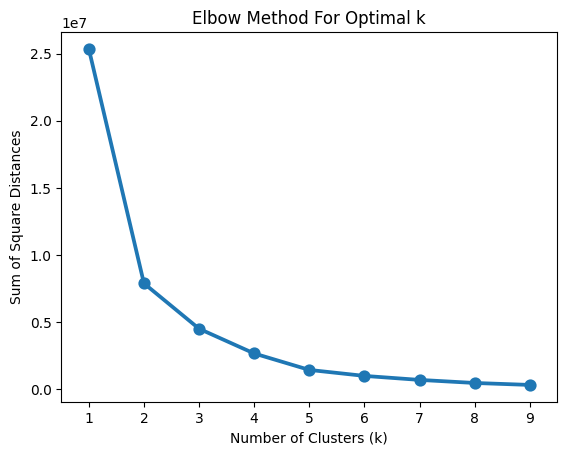

In [85]:
# Import KMeans from the sklearn.cluster module.
from sklearn.cluster import KMeans

# Initialize an empty dictionary to store the sum of square distances.
sum_of_sq_dist = {}

# Iterate through a range of values for k (number of clusters).
for k in range(1, 10):
    # Initialize KMeans with the current value of k.
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    # Fit KMeans to the data and calculate the sum of square distances.
    km = km.fit(X)
    # Store the sum of square distances in the dictionary.
    sum_of_sq_dist[k] = km.inertia_

# Plot the graph for the sum of square distance values and Number of Clusters.
sns.pointplot(x=list(sum_of_sq_dist.keys()), y=list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [86]:
# Import silhouette_score from the sklearn.metrics module.
from sklearn.metrics import silhouette_score

# Initialize an empty list to store silhouette scores.
silhouette_avg = []

# Calculate average silhouette score for each number of clusters (2 to 10).
for k in range(2, 10):
    # Initialize KMeans with the current value of k.
    km = KMeans(n_clusters=k, random_state=1)
    # Fit KMeans to the data.
    km.fit(X)
    # Calculate silhouette score and append to the list.
    silhouette_avg.append(silhouette_score(X, km.labels_))

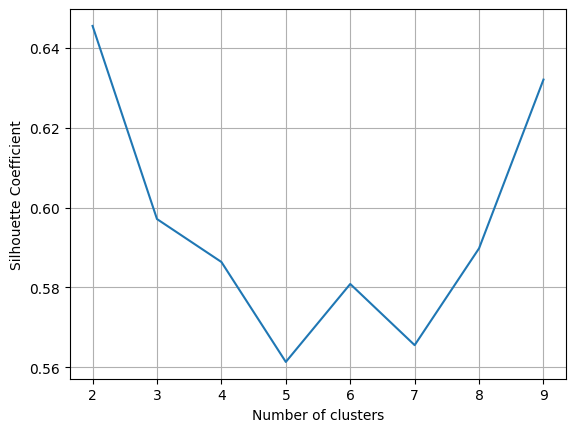

In [87]:
# plot the results
plt.plot(range(2,10), silhouette_avg)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

We can see from above two plots the Optimal number of Clusters is 5 .

In [88]:
# Import KMeans from the sklearn.cluster module.
from sklearn.cluster import KMeans

# Initialize KMeans model with random state and number of clusters.
model = KMeans(random_state=11, n_clusters=5)

# Fit the model to the data.
model.fit(X)

KMeans(n_clusters=5, random_state=11)

In [89]:
# Predict the cluster labels for the data using the trained KMeans model.
cluster_labels = model.predict(X)

In [90]:
# Assign the cluster labels to the 'labels' column in the DataFrame 'cluster_dataset'.
cluster_dataset['labels'] = cluster_labels

# Display the first 10 rows of the DataFrame 'cluster_dataset' with cluster labels.
cluster_dataset.head(10)

Name  Cost  \
0               10 Downing Street  1900   
1                        13 Dhaba   450   
2  3B's - Buddies, Bar & Barbecue  1100   
3       AB's - Absolute Barbecues  1500   
4               Absolute Sizzlers   750   
5              Al Saba Restaurant   750   
6             American Wild Wings   600   
7                            Amul   150   
8                    Arena Eleven  1600   
9                    Aromas@11SIX   750   

                                            Cuisines    Rating  \
0                 north indian, chinese, continental  3.800000   
1                                       north indian  3.480000   
2              north indian, mediterranean, european  4.760000   
3              european, mediterranean, north indian  4.880000   
4                     continental, american, chinese  3.620000   
5  north indian, chinese, seafood, biryani, hyder...  3.155000   
6                 american, fast food, salad, burger  3.974026   
7                                ice cream, desserts  3.940000   
8                                        continental  4.117647   
9            north indian, chinese, mughlai, biryani  3.460000   

   cuisine_Dessert  cuisine_Healthy food  cuisine_Fast food  \
0                0                     0                  0   
1                0                     0                  0   
2                0                     0                  0   
3                0                     0                  0   
4                0                     0                  0   
5                0                     0                  0   
6                0                     0                  0   
7                0                     0                  0   
8                0                     0                  0   
9                0                     0                  0   

   cuisine_Spicy food  labels  
0                   0       1  
1                   0       0  
2                   0       4  
3                   0       1  
4                   0       2  
5                   0       2  
6                   0       2  
7                   0       0  
8                   0       1  
9                   0       2

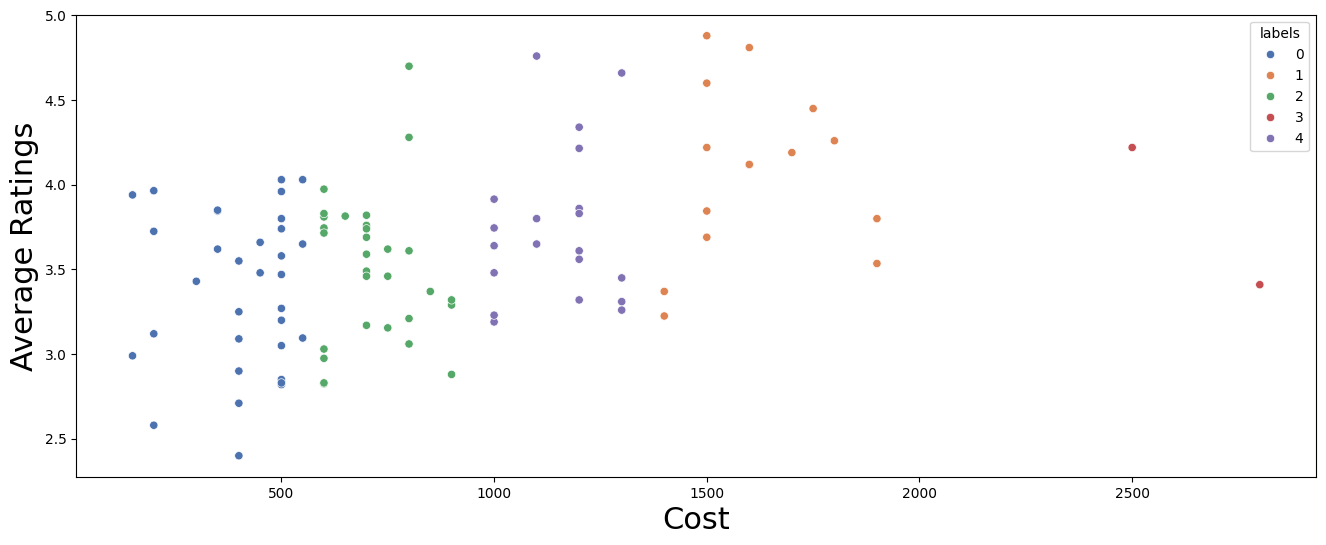

In [96]:
# Set the size of the plot figure to 16x6 inches.
plt.figure(figsize=(16, 6))

# Create a scatter plot to visualize the relationship between 'Cost' and 'Rating', colored by cluster labels.
sns.scatterplot(x='Cost', y='Rating', data=cluster_dataset, hue='labels', palette='deep')

# Set labels for the x and y axes.
plt.ylabel('Average Ratings', fontdict={'size': 22})
plt.xlabel('Cost', fontdict={'size': 22})

# Display the plot.
plt.show()

We can See from above scatter plot Resturant are clustered well on cost and ratings.

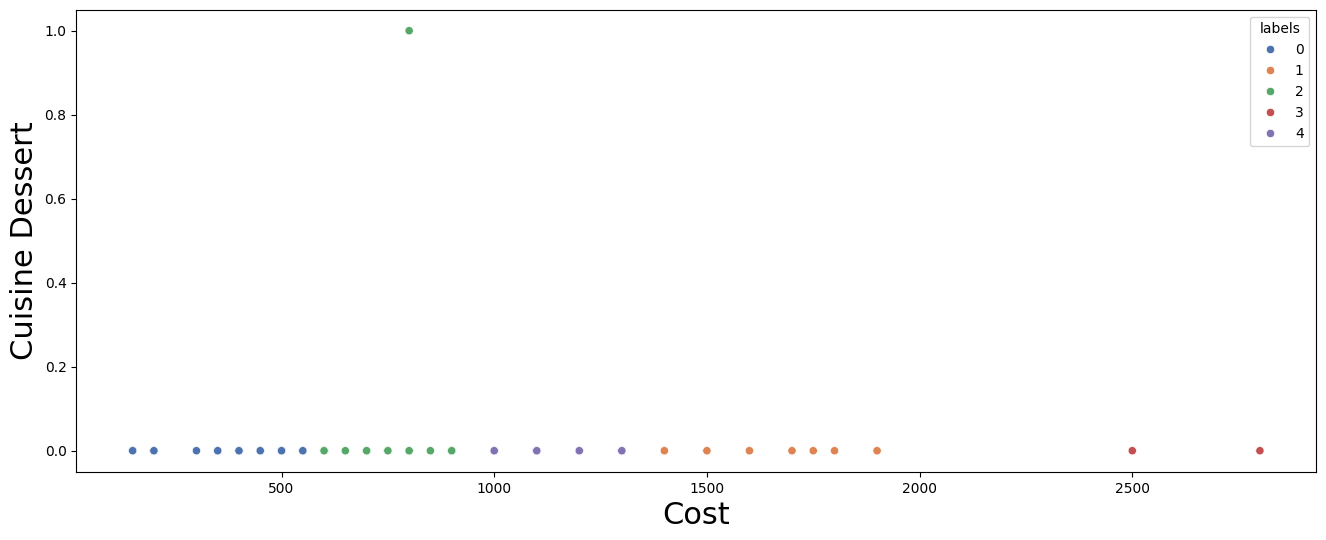

In [92]:
# Set the size of the plot figure to 16x6 inches.
plt.figure(figsize=(16, 6))

# Create a scatter plot to visualize the relationship between 'Cost' and 'cuisine_Dessert', colored by cluster labels.
sns.scatterplot(x='Cost', y='cuisine_Dessert', data=cluster_dataset, hue='labels', palette='deep')

# Set labels for the x and y axes.
plt.ylabel('Cuisine Dessert', fontdict={'size': 22})
plt.xlabel('Cost', fontdict={'size': 22})

# Display the plot.
plt.show()

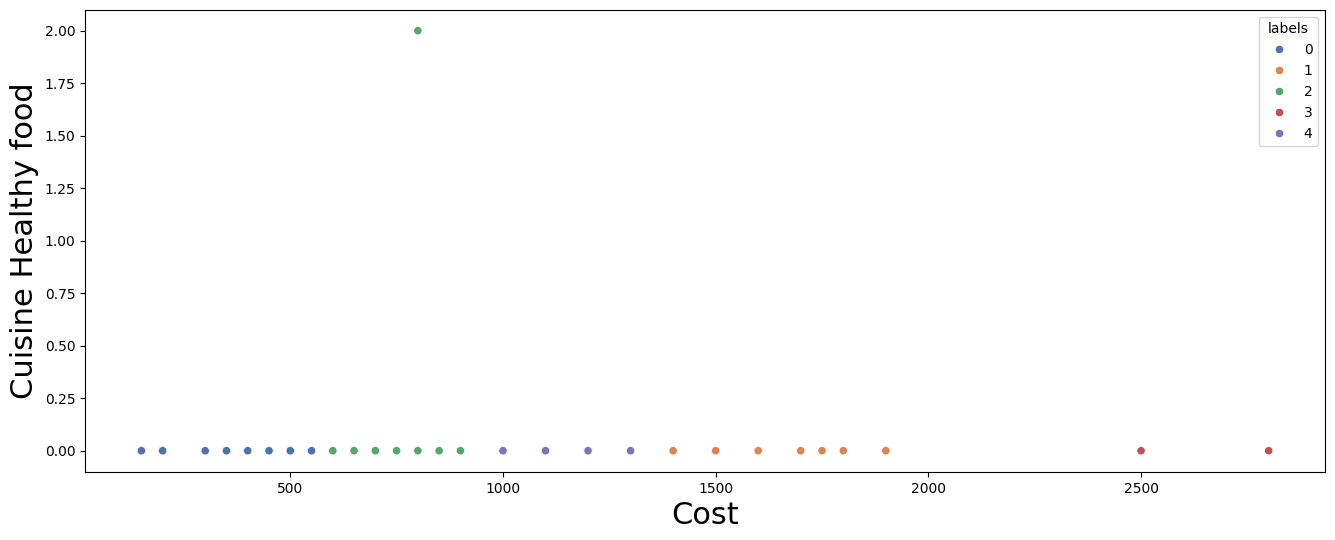

In [93]:
# Set the size of the plot figure to 16x6 inches.
plt.figure(figsize=(16, 6))

# Create a scatter plot to visualize the relationship between 'Cost' and 'cuisine_Healthy food', colored by cluster labels.
sns.scatterplot(x='Cost', y='cuisine_Healthy food', data=cluster_dataset, hue='labels', palette='deep')

# Set labels for the x and y axes.
plt.ylabel('Cuisine Healthy food', fontdict={'size': 22})
plt.xlabel('Cost', fontdict={'size': 22})

# Display the plot.
plt.show()


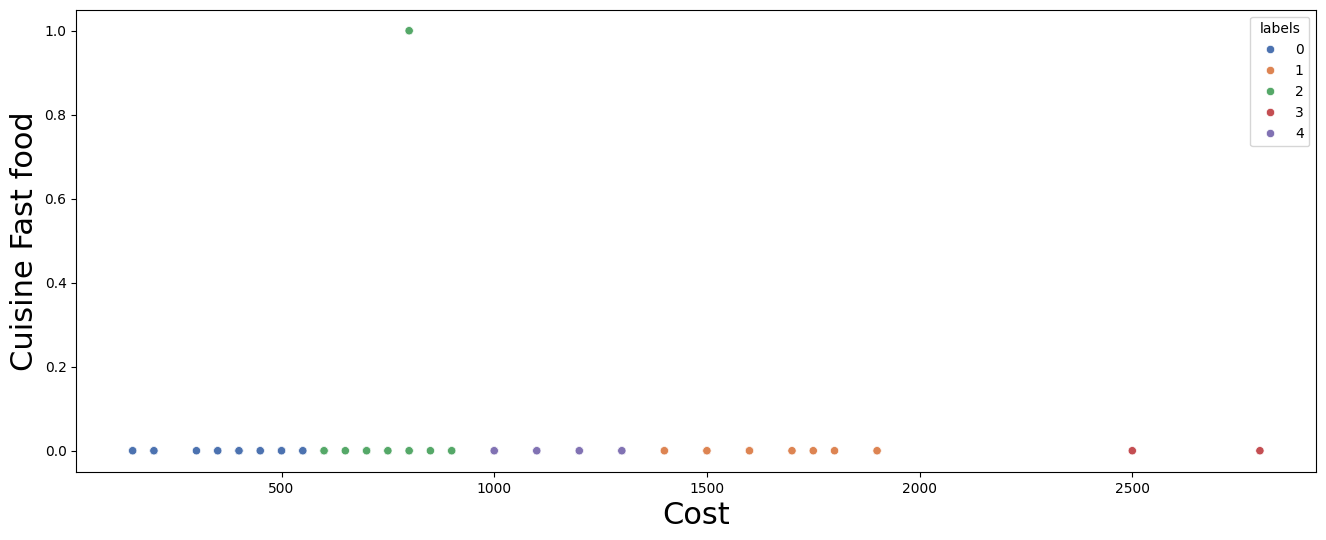

In [97]:
# Set the size of the plot figure to 16x6 inches.
plt.figure(figsize=(16, 6))

# Create a scatter plot to visualize the relationship between 'Cost' and 'cuisine_fast food', colored by cluster labels.
sns.scatterplot(x='Cost', y='cuisine_Fast food', data=cluster_dataset, hue='labels', palette='deep')

# Set labels for the x and y axes.
plt.ylabel('Cuisine Fast food', fontdict={'size': 22})
plt.xlabel('Cost', fontdict={'size': 22})

# Display the plot.
plt.show()

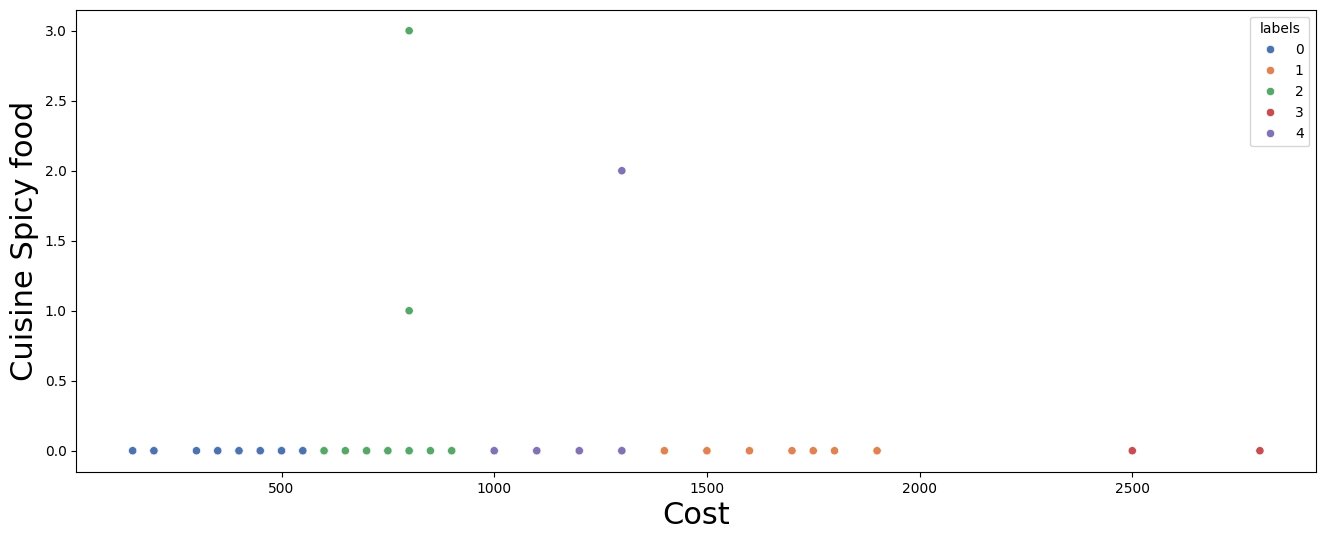

In [99]:
# Set the size of the plot figure to 16x6 inches.
plt.figure(figsize=(16, 6))

# Create a scatter plot to visualize the relationship between 'Cost' and 'cuisine_spicy food', colored by cluster labels.
sns.scatterplot(x='Cost', y='cuisine_Spicy food', data=cluster_dataset, hue='labels', palette='deep')

# Set labels for the x and y axes.
plt.ylabel('Cuisine Spicy food', fontdict={'size': 22})
plt.xlabel('Cost', fontdict={'size': 22})

# Display the plot.
plt.show()

### **Name of Restaurants, Ratings in Different Clusters**

In [100]:
# Filter the DataFrame 'cluster_dataset' to get rows where 'labels' column equals 0 (cluster 1).
# Select columns 'Name', 'Rating', and 'labels' for display.
cluster_1 = cluster_dataset.loc[cluster_dataset['labels'] == 0]
cluster_1[['Name', 'Rating', 'labels']].head()

Name  Rating  labels
1            13 Dhaba    3.48       0
7                Amul    3.94       0
10     Asian Meal Box    2.58       0
15       Being Hungry    3.66       0
17  Biryanis And More    3.74       0

In [102]:
# Filter the DataFrame 'cluster_dataset' to get rows where 'labels' column equals 1 (cluster 2).
# Select columns 'Name', 'Rating', and 'labels' for display.
cluster_2 = cluster_dataset.loc[cluster_dataset['labels'] == 1]
cluster_2[['Name', 'Rating', 'labels']].head()

Name    Rating  labels
0           10 Downing Street  3.800000       1
3   AB's - Absolute Barbecues  4.880000       1
8                Arena Eleven  4.117647       1
11                     B-Dubs  4.810000       1
13            Barbeque Nation  4.120000       1

In [103]:
# Filter the DataFrame 'cluster_dataset' to get rows where 'labels' column equals 2 (cluster 3).
# Select columns 'Name', 'Rating', and 'labels' for display.
cluster_3 = cluster_dataset.loc[cluster_dataset['labels'] == 2]
cluster_3[['Name', 'Rating', 'labels']].head()

Name    Rating  labels
4                     Absolute Sizzlers  3.620000       2
5                    Al Saba Restaurant  3.155000       2
6                   American Wild Wings  3.974026       2
9                          Aromas@11SIX  3.460000       2
12  Banana Leaf Multicuisine Restaurant  3.690000       2

In [104]:
# Filter the DataFrame 'cluster_dataset' to get rows where 'labels' column equals 3 (cluster 4).
# Select columns 'Name', 'Rating', and 'labels' for display.
cluster_4 = cluster_dataset.loc[cluster_dataset['labels'] == 3]
cluster_4[['Name', 'Rating', 'labels']].head()

Name  Rating  labels
22  Collage - Hyatt Hyderabad Gachibowli    3.41       3
34      Feast - Sheraton Hyderabad Hotel    4.22       3

In [105]:
# Filter the DataFrame 'cluster_dataset' to get rows where 'labels' column equals 4 (cluster 5).
# Select columns 'Name', 'Rating', and 'labels' for display.
cluster_5 = cluster_dataset.loc[cluster_dataset['labels'] == 4]
cluster_5[['Name', 'Rating', 'labels']].head()

Name  Rating  labels
2   3B's - Buddies, Bar & Barbecue   4.760       4
20                Chinese Pavilion   3.745       4
28                 Diners Pavilion   3.320       4
32               Eat India Company   3.260       4
35                        Flechazo   4.660       4

## **Name of Cuisines in Different Clusters**

In [106]:
# Display the first few rows of the DataFrame 'cluster_dataset'.
cluster_dataset.head()

Name  Cost  \
0               10 Downing Street  1900   
1                        13 Dhaba   450   
2  3B's - Buddies, Bar & Barbecue  1100   
3       AB's - Absolute Barbecues  1500   
4               Absolute Sizzlers   750   

                                Cuisines  Rating  cuisine_Dessert  \
0     north indian, chinese, continental    3.80                0   
1                           north indian    3.48                0   
2  north indian, mediterranean, european    4.76                0   
3  european, mediterranean, north indian    4.88                0   
4         continental, american, chinese    3.62                0   

   cuisine_Healthy food  cuisine_Fast food  cuisine_Spicy food  labels  
0                     0                  0                   0       1  
1                     0                  0                   0       0  
2                     0                  0                   0       4  
3                     0                  0                   0       1  
4                     0                  0                   0       2

In [107]:
# Define a function 'cuisine_list' to split and extract unique cuisines from a string.

def cuisine_list(cuisines):
    # Split the string by ', ' and convert to a list of unique cuisines.
    all_cuisines = list(set(cuisines.split(', ')))
    return all_cuisines

# Apply the 'cuisine_list' function to the 'Cuisines' column of the DataFrame 'cluster_dataset'.
cluster_dataset['Cuisines'] = cluster_dataset['Cuisines'].apply(lambda x: cuisine_list(x))

In [108]:
# Display the first few rows of the DataFrame 'cluster_dataset'.
cluster_dataset.head()

Name  Cost  \
0               10 Downing Street  1900   
1                        13 Dhaba   450   
2  3B's - Buddies, Bar & Barbecue  1100   
3       AB's - Absolute Barbecues  1500   
4               Absolute Sizzlers   750   

                                  Cuisines  Rating  cuisine_Dessert  \
0     [chinese, continental, north indian]    3.80                0   
1                           [north indian]    3.48                0   
2  [mediterranean, european, north indian]    4.76                0   
3  [mediterranean, north indian, european]    4.88                0   
4         [continental, american, chinese]    3.62                0   

   cuisine_Healthy food  cuisine_Fast food  cuisine_Spicy food  labels  
0                     0                  0                   0       1  
1                     0                  0                   0       0  
2                     0                  0                   0       4  
3                     0                  0                   0       1  
4                     0                  0                   0       2

In [109]:
# Explode the 'Cuisines' column of the DataFrame 'cluster_dataset' to create multiple rows for each cuisine.
exploded_cuisine = cluster_dataset.explode("Cuisines")

In [110]:
# Iterate through each cluster and print unique cuisines for each cluster.
for i in range(5):
    print('Cluster no', i)
    print(exploded_cuisine[exploded_cuisine["labels"] == i]['Cuisines'].unique())
    print('\n')

Cluster no 0
['north indian' 'desserts' 'ice cream' 'asian' 'chinese' 'biryani'
 'fast food' 'pizza' 'burger' 'beverages' 'cafe' 'american' 'bakery'
 'hyderabadi' 'andhra' 'south indian' 'street food' 'arabian' 'momos'
 'lebanese' 'kebab' 'wraps' 'north eastern' 'continental' 'healthy food']


Cluster no 1
['chinese' 'continental' 'north indian' 'mediterranean' 'european'
 'american' 'kebab' 'bbq' 'italian' 'asian' 'salad' 'sushi' 'japanese'
 'south indian' 'seafood' 'goan' 'modern indian' 'andhra']


Cluster no 2
['continental' 'american' 'chinese' 'biryani' 'seafood' 'hyderabadi'
 'north indian' 'fast food' 'burger' 'salad' 'mughlai' 'south indian'
 'andhra' 'kebab' 'european' 'bakery' 'cafe' 'desserts' 'asian' 'momos'
 'beverages' 'arabian' 'thai' 'indonesian' 'italian']


Cluster no 3
['italian' 'continental' 'north indian' 'chinese' 'asian' 'modern indian']


Cluster no 4
['mediterranean' 'european' 'north indian' 'chinese' 'seafood'
 'continental' 'italian' 'mughlai' 'beverages' 

North indian, Continental and Chinese are available mostly in every Cluster.

# **Sentiment Analysis**

## **Reviews Data**

In [111]:
# Display the first few rows of the DataFrame 'reviews_df'.
reviews_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

In [112]:
# Display concise summary information about the DataFrame 'reviews_df', including column data types and non-null counts.
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


Our Rating is of dtype Object lets check why.

In [113]:
# Count the occurrences of each unique value in the 'Rating' column of the DataFrame 'reviews_df'.
reviews_df['Rating'].value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [114]:
# Remove nan rating in Rating column
reviews_df.dropna(subset=['Rating'],inplace=True)

In [115]:
reviews_df['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like'],
      dtype=object)

### **Data Cleaning**

In [116]:
#lets replace Like with NaN.
reviews_df['Rating'].loc[reviews_df['Rating'] == 'Like'] = np.nan
#lets convert Rating Dtype into Float.
reviews_df['Rating']= reviews_df['Rating'].astype('float64')

In [117]:
# Display concise summary information about the DataFrame 'reviews_df' to check for any changes after manipulation.
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9962 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  9962 non-null   object 
 1   Reviewer    9962 non-null   object 
 2   Review      9955 non-null   object 
 3   Rating      9961 non-null   float64
 4   Metadata    9962 non-null   object 
 5   Time        9962 non-null   object 
 6   Pictures    9962 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 622.6+ KB


In [118]:
# Calculate the mean value of the 'Rating' column in the DataFrame 'reviews_df'.
reviews_df['Rating'].mean()

3.601044071880333

In [119]:
# Fill missing values in the 'Rating' column of the DataFrame 'reviews_df' with the value 3.6.
reviews_df['Rating'].fillna(3.6, inplace=True)

In [120]:
# Lets check the Null values in our data.
reviews_df.isnull().sum()

Restaurant    0
Reviewer      0
Review        7
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

In [121]:
# Count the number of duplicated rows in the DataFrame 'reviews_df'.
reviews_df.duplicated().sum()

0

In [122]:
# spliting metadata column into 2 columns i.e. Reviews and followers
reviews_df['Reviews'],reviews_df['Followers']= reviews_df['Metadata'].str.split(',').str
reviews_df['Reviews'] = pd.to_numeric(reviews_df['Reviews'].str.split(' ').str[0])
reviews_df['Followers']= pd.to_numeric(reviews_df['Followers'].str.split(' ').str[1])

In [123]:
# Display the first few rows of the DataFrame 'reviews_df'.
reviews_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                  Metadata             Time  Pictures  Reviews  Followers  
0   1 Review , 2 Followers  5/25/2019 15:54         0        1        2.0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0        3        2.0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0        2        3.0  
3    1 Review , 1 Follower  5/24/2019 22:11         0        1        1.0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0        3        2.0

In [124]:
# Remove the 'Metadata' column from the DataFrame 'reviews_df'.
reviews_df = reviews_df.drop(['Metadata'], axis=1)

In [125]:
# lets convert Time to DateTime format and extract year, Month, Days and hours.
reviews_df['Time']=pd.to_datetime(reviews_df['Time'])
reviews_df['Year'] = pd.DatetimeIndex(reviews_df['Time']).year
reviews_df['Month'] = pd.DatetimeIndex(reviews_df['Time']).month
reviews_df['Day'] = pd.DatetimeIndex(reviews_df['Time']).day
reviews_df['Hour'] = pd.DatetimeIndex(reviews_df['Time']).hour

In [126]:
# Display the first few rows of the DataFrame 'reviews_df' after removing the 'Metadata' column.
reviews_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                 Time  Pictures  Reviews  Followers  Year  Month  Day  Hour  
0 2019-05-25 15:54:00         0        1        2.0  2019      5   25    15  
1 2019-05-25 14:20:00         0        3        2.0  2019      5   25    14  
2 2019-05-24 22:54:00         0        2        3.0  2019      5   24    22  
3 2019-05-24 22:11:00         0        1        1.0  2019      5   24    22  
4 2019-05-24 21:37:00         0        3        2.0  2019      5   24    21

In [127]:
# Check for missing values in each column of the DataFrame 'reviews_df' and sum them up.
reviews_df.isnull().sum()

Restaurant       0
Reviewer         0
Review           7
Rating           0
Time             0
Pictures         0
Reviews          0
Followers     1578
Year             0
Month            0
Day              0
Hour             0
dtype: int64

In [128]:
# Replacing followers and reviews null values into 0
reviews_df['Followers'].fillna(0,inplace=True)
reviews_df['Reviews'].fillna(0,inplace=True)

In [129]:
# Check for missing values in each column of the DataFrame 'reviews_df' and sum them up.
reviews_df.isnull().sum()

Restaurant    0
Reviewer      0
Review        7
Rating        0
Time          0
Pictures      0
Reviews       0
Followers     0
Year          0
Month         0
Day           0
Hour          0
dtype: int64

In [130]:
# we can drop the remaining missing data
reviews_df.dropna(inplace=True)

In [131]:
# Reset the index of the DataFrame 'reviews_df' in place.
reviews_df.reset_index(inplace=True)

In [132]:
# Check for missing values in each column of the DataFrame 'reviews_df' after resetting the index.
reviews_df.isnull().sum()

index         0
Restaurant    0
Reviewer      0
Review        0
Rating        0
Time          0
Pictures      0
Reviews       0
Followers     0
Year          0
Month         0
Day           0
Hour          0
dtype: int64

We have removed all null values.

In [133]:
# Display the shape (number of rows and columns) of the DataFrame 'reviews_df'.
reviews_df.shape

(9955, 13)

## **EDA on Reviews Data**

In [134]:
# Set the display figure size using rcParams method
plt.rcParams['figure.figsize'] = [10,6]

<Axes: xlabel='Rating', ylabel='count'>

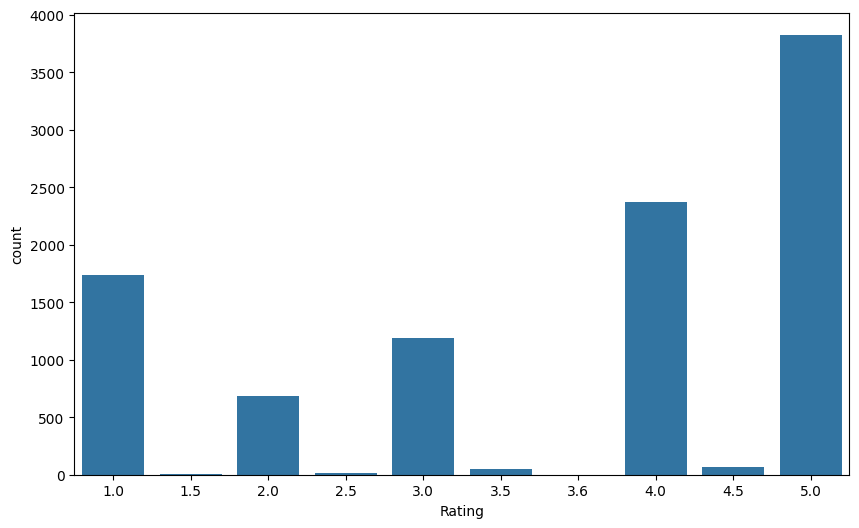

In [135]:
# Create a count plot to visualize the distribution of ratings in the DataFrame 'reviews_df'.
sns.countplot(x='Rating', data=reviews_df)

We can see most people gave 5.0 Ratings.

<Axes: xlabel='Year', ylabel='count'>

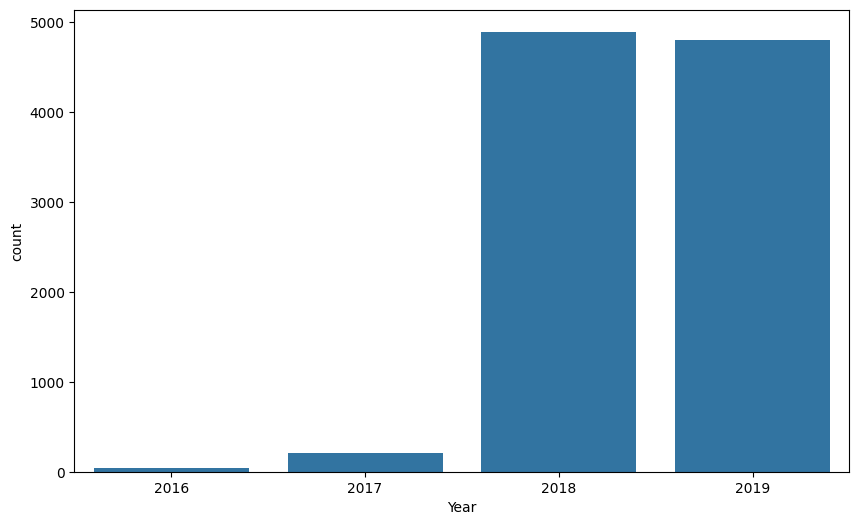

In [136]:
# Create a count plot to visualize the distribution of years in the DataFrame 'reviews_df'.
sns.countplot(x='Year', data=reviews_df)

We can see from above plot that most people started Reviewing since 2018.


<Axes: xlabel='Year', ylabel='count'>

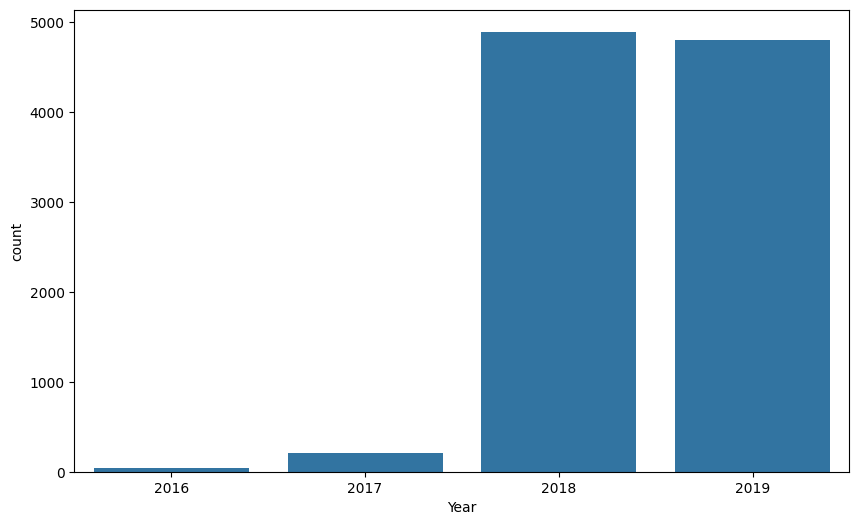

In [137]:
# Create a count plot to visualize the distribution of years in the DataFrame 'reviews_df'.
sns.countplot(x='Year', data=reviews_df)

Most Reviews are coming during the month of May and July.

<Axes: xlabel='Hour', ylabel='count'>

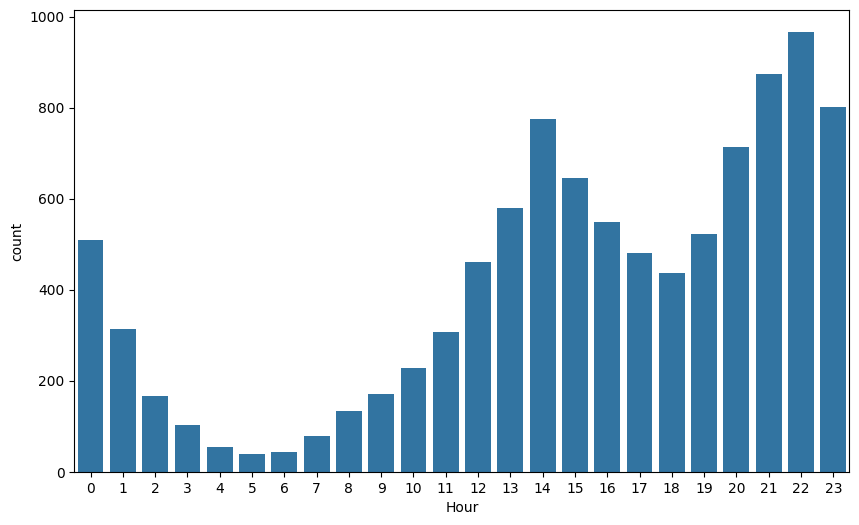

In [138]:
# Create a count plot to visualize the distribution of Hours in the DataFrame 'reviews_df'.
sns.countplot(x = 'Hour', data = reviews_df)

Most Reviews are coming during Afternoon and at Night which is logical because it is a time of Lunch and Dinner i.e. when people usually have free time.

In [139]:
# Group the DataFrame 'reviews_df' by 'Restaurant', calculate the mean rating for each restaurant,
# sort the results in descending order, and reset the index.
df_rating = reviews_df.groupby(['Restaurant'])['Rating'].mean().sort_values(ascending=False).reset_index()

# Display the top 10 restaurants with the highest average ratings.
df_rating[:10]

Restaurant  Rating
0                AB's - Absolute Barbecues    4.88
1                                   B-Dubs    4.81
2           3B's - Buddies, Bar & Barbecue    4.76
3                                 Paradise    4.70
4                                 Flechazo    4.66
5                           The Indi Grill    4.60
6          Zega - Sheraton Hyderabad Hotel    4.45
7               Over The Moon Brew Company    4.34
8                          Beyond Flavours    4.28
9  Cascade - Radisson Hyderabad Hitec City    4.26

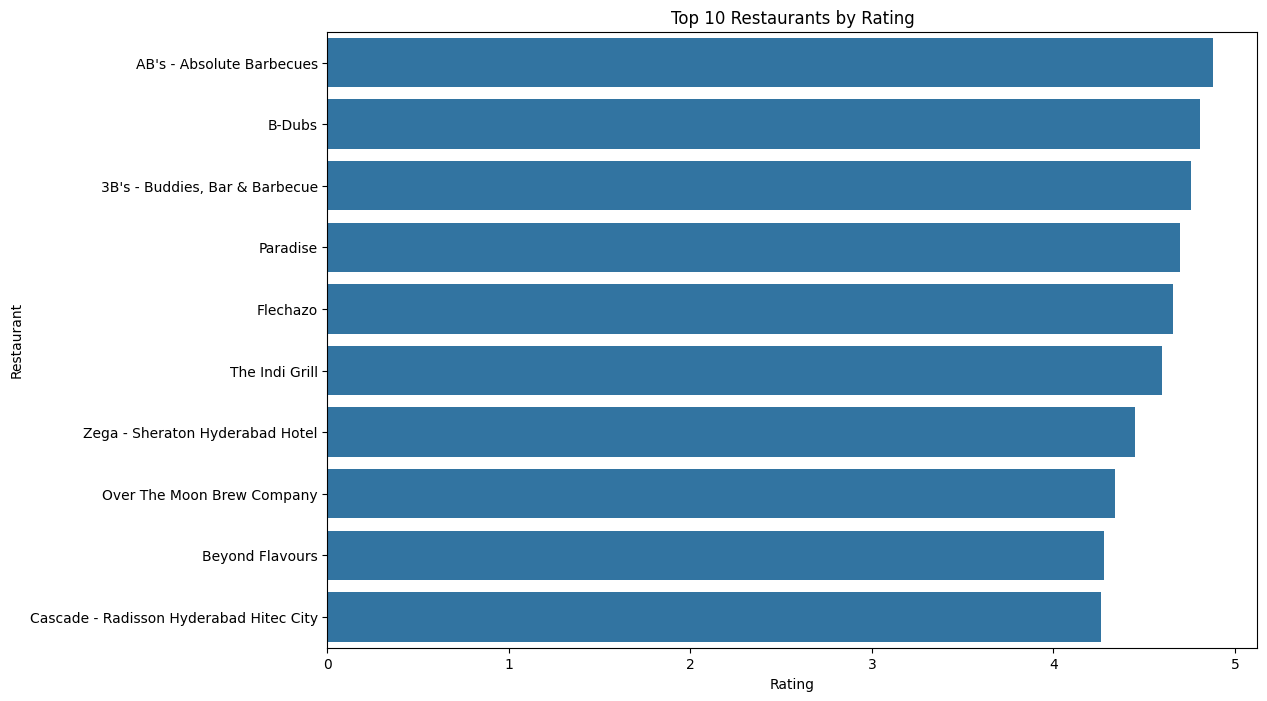

In [140]:
# Create a figure with size 12x8 inches.
fig = plt.figure(figsize=[12, 8])

# Create a bar plot to visualize the top 10 restaurants by rating.
sns.barplot(data=df_rating[:10], x='Rating', y='Restaurant')

# Set the title of the plot.
plt.title('Top 10 Restaurants by Rating')

# Display the plot.
plt.show()

In [141]:
# Display the top few rows of reviews_df
reviews_df.head()

index       Restaurant              Reviewer  \
0      0  Beyond Flavours     Rusha Chakraborty   
1      1  Beyond Flavours  Anusha Tirumalaneedi   
2      2  Beyond Flavours       Ashok Shekhawat   
3      3  Beyond Flavours        Swapnil Sarkar   
4      4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                 Time  Pictures  Reviews  Followers  Year  Month  Day  Hour  
0 2019-05-25 15:54:00         0        1        2.0  2019      5   25    15  
1 2019-05-25 14:20:00         0        3        2.0  2019      5   25    14  
2 2019-05-24 22:54:00         0        2        3.0  2019      5   24    22  
3 2019-05-24 22:11:00         0        1        1.0  2019      5   24    22  
4 2019-05-24 21:37:00         0        3        2.0  2019      5   24    21

In [142]:
# Group the DataFrame 'reviews_df' by 'Reviewer', aggregating the sum of reviews and followers,
# and calculating the mean rating for each reviewer. Reset the index of the resulting DataFrame.
df_Reviewer = reviews_df.groupby(['Reviewer']).agg({'Reviews': 'sum', 'Followers': 'sum', 'Rating': 'mean'}).reset_index()

# Display the first 15 rows of the DataFrame.
df_Reviewer[:15]

Reviewer  Reviews  Followers  Rating
0                     #FOODPORN       35     5873.0     5.0
1           #chloesviews // CAH        3        1.0     5.0
2                          $ign       50       55.0     4.0
3                      4mybanti        7        4.0     2.0
4   @FuloriBinaChutneyKaiseBani       86      244.0     5.0
5             @Vignesh #FoodMad       20      509.0     4.0
6           @foodie.amy6 | AMNA       69      703.0     5.0
7                           A K       12     2654.0     5.0
8                    A K RAJEEV        1        2.0     5.0
9                 A Vinod Kumar        1        1.0     1.0
10            AAKRITI BHATNAGAR       40      317.0     1.0
11                        ABD X        4        0.0     1.0
12                 ABDUL MAJEED        9        0.0     5.0
13                      ABHI07💪       16      311.0     5.0
14                      ABHINAV        8       80.0     1.0

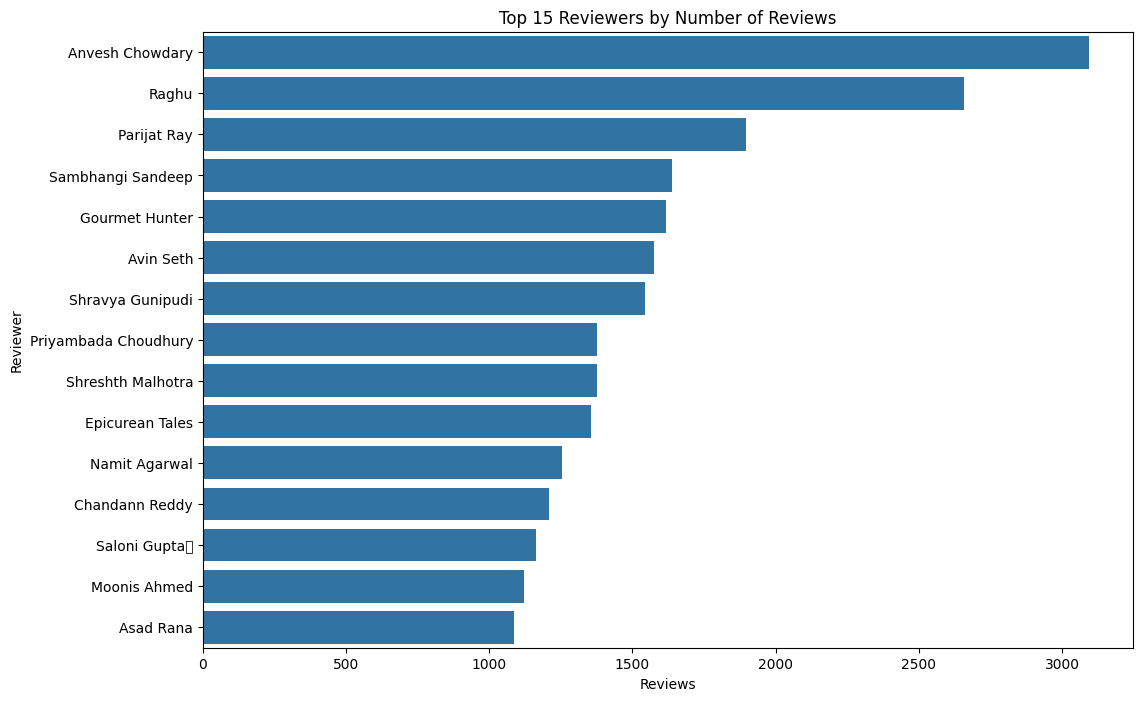

In [143]:
# Create a figure with size 12x8 inches.
fig = plt.figure(figsize=[12, 8])

# Create a bar plot to visualize the top 15 reviewers by number of reviews.
sns.barplot(data=df_Reviewer, x='Reviews', y='Reviewer', order=df_Reviewer.sort_values(by='Reviews', ascending=False).Reviewer[:15])

# Set the title of the plot.
plt.title('Top 15 Reviewers by Number of Reviews')

# Display the plot.
plt.show()

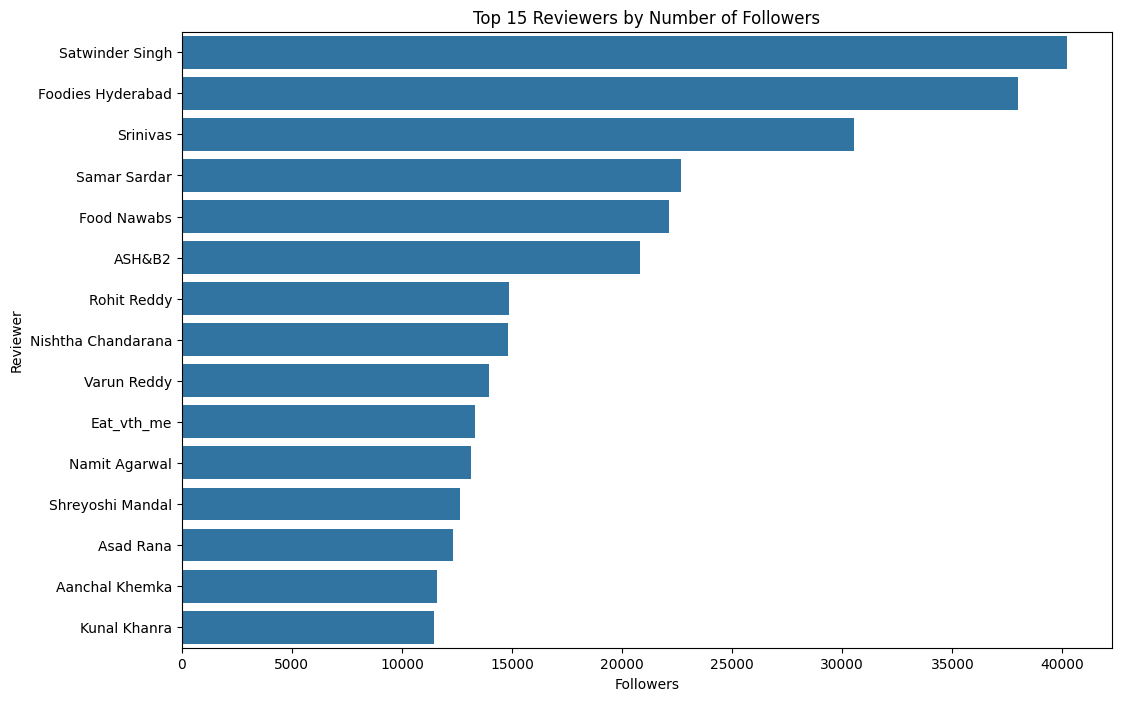

In [144]:
# Create a figure with size 12x8 inches.
fig = plt.figure(figsize=[12, 8])

# Create a bar plot to visualize the top 15 reviewers by number of followers.
sns.barplot(data=df_Reviewer, x='Followers', y='Reviewer', order=df_Reviewer.sort_values(by='Followers', ascending=False).Reviewer[:15])

# Set the title of the plot.
plt.title('Top 15 Reviewers by Number of Followers')

# Display the plot.
plt.show()

# **Data Preprocessing**

The objective of this step is to clean noise those are less relevant to find the sentiment of Reviewer such as punctuation(.,?,” etc.), special characters(@,%,&,$, etc.), numbers(1,2,3, etc.), emojis and terms which don’t carry much weightage in context to the text.

In [145]:
#import some library for preprocessing.
import nltk
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [146]:
# Display the top 10 rows of reviews_df
reviews_df.head(10)

index       Restaurant              Reviewer  \
0      0  Beyond Flavours     Rusha Chakraborty   
1      1  Beyond Flavours  Anusha Tirumalaneedi   
2      2  Beyond Flavours       Ashok Shekhawat   
3      3  Beyond Flavours        Swapnil Sarkar   
4      4  Beyond Flavours                Dileep   
5      5  Beyond Flavours         Nagabhavani K   
6      6  Beyond Flavours       Jamuna Bhuwalka   
7      7  Beyond Flavours             Sandhya S   
8      8  Beyond Flavours          Akash Thorat   
9      9  Beyond Flavours        Smarak Patnaik   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   
5  Ambiance is good, service is good, food is aPr...     5.0   
6  Its a very nice place, ambience is different, ...     5.0   
7  Well after reading so many reviews finally vis...     4.0   
8  Excellent food , specially if you like spicy f...     5.0   
9  Came for the birthday treat of a close friend....     5.0   

                 Time  Pictures  Reviews  Followers  Year  Month  Day  Hour  
0 2019-05-25 15:54:00         0        1        2.0  2019      5   25    15  
1 2019-05-25 14:20:00         0        3        2.0  2019      5   25    14  
2 2019-05-24 22:54:00         0        2        3.0  2019      5   24    22  
3 2019-05-24 22:11:00         0        1        1.0  2019      5   24    22  
4 2019-05-24 21:37:00         0        3        2.0  2019      5   24    21  
5 2019-05-24 15:22:00         0        1        0.0  2019      5   24    15  
6 2019-05-24 01:02:00         0        1        0.0  2019      5   24     1  
7 2019-05-23 15:01:00         0        1        0.0  2019      5   23    15  
8 2019-05-22 23:12:00         0        1        1.0  2019      5   22    23  
9 2019-05-22 22:37:00         0        1        1.0  2019      5   22    22

In [147]:
# Display the rows of the review column
reviews_df.Review

0       The ambience was good, food was quite good . h...
1       Ambience is too good for a pleasant evening. S...
2       A must try.. great food great ambience. Thnx f...
3       Soumen das and Arun was a great guy. Only beca...
4       Food is good.we ordered Kodi drumsticks and ba...
                              ...                        
9950    Madhumathi Mahajan Well to start with nice cou...
9951    This place has never disappointed us.. The foo...
9952    Bad rating is mainly because of "Chicken Bone ...
9953    I personally love and prefer Chinese Food. Had...
9954    Checked in here to try some delicious chinese ...
Name: Review, Length: 9955, dtype: object

### Removing Punctuation.

In [148]:
# Import the string module.
import string

# Get a string containing all punctuation characters.
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [149]:
# Define a function 'remove_punctuation' for removing punctuation from text.
def remove_punctuation(text):
    '''A function for removing punctuation.'''
    # Use list comprehension to iterate over each character in the text and exclude punctuation characters.
    text_nopunct = ''.join([i for i in text if i not in string.punctuation])
    return text_nopunct

In [150]:
# let apply the function
reviews_df['Review']= reviews_df['Review'].apply(remove_punctuation)

In [151]:
# Access the first review in the 'Review' column of the DataFrame 'reviews_df'.
reviews_df['Review'][0]

'The ambience was good food was quite good  had Saturday lunch  which was cost effective \nGood place for a sate brunch One can also chill with friends and or parents\nWaiter Soumen Das was really courteous and helpful'

In [152]:
# function to remove Hashtags and Digits.
def remove_noise(tweet):
  #remove hashtags
  tweet = re.sub(r'#\w+','' , tweet)
  # remove digits
  tweet = re.sub(r'\d+',' ', tweet)
  # Normalize whitespace
  tweet = re.sub(r'\s+', ' ', tweet).strip()
  return tweet

In [153]:
# let apply the function
reviews_df['Review']= reviews_df['Review'].apply(remove_noise)

## Removing stopwords

In [154]:
# Import the nltk module and download the stopwords corpus.
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [155]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [156]:
#function for removing stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [157]:
# let apply the function
reviews_df['Review']= reviews_df['Review'].apply(stopwords)

In [158]:
# Access the first review in the 'Review' column of the DataFrame 'reviews_df'.
reviews_df['Review'][0]

'ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friends parents waiter soumen das really courteous helpful'

In [159]:
# Concatenate all reviews into a single string.
all_words = ' '.join([text for text in reviews_df['Review']])

In [160]:
all_words

'ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friends parents waiter soumen das really courteous helpful ambience good pleasant evening service prompt food good good experience soumen das kudos service must try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta also music background amazing soumen das arun great guy behavior sincerety good food course would like visit place food goodwe ordered kodi drumsticks basket mutton biryani good thanks pradeep served well enjoyed ambience also good ambiance good service good food apradeecp subro best service food good papiya good hostess ur caption good star restaurant nice place ambience different food ordered tasty service also gud worth visit reasonable well really must visit place well reading many reviews finally visited placeambience good coming food crispy corn nice tawa fish ok basket biryani disappointed us biryani ok flattering claimed 

We have Some Emojis in our data lets remove it.

In [161]:
# Import the re module for regular expressions.
import re

# Define a function 'remove_emojis' to remove emojis from text using a regular expression pattern.
def remove_emojis(text):
    # Define a regular expression pattern to match emojis and various symbols.
    emoj = re.compile("["
                      u"\U0001F600-\U0001F64F"  # emoticons
                      u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                      u"\U0001F680-\U0001F6FF"  # transport & map symbols
                      u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                      u"\U00002500-\U00002BEF"  # chinese char
                      u"\U00002702-\U000027B0"
                      u"\U00002702-\U000027B0"
                      u"\U000024C2-\U0001F251"
                      u"\U0001f926-\U0001f937"
                      u"\U00010000-\U0010ffff"
                      u"\u2640-\u2642"
                      u"\u2600-\u2B55"
                      u"\u200d"
                      u"\u23cf"
                      u"\u23e9"
                      u"\u231a"
                      u"\ufe0f"  # dingbats
                      u"\u3030"
                      "]+", re.UNICODE)

    # Use re.sub() to replace emoji patterns with an empty string.
    return re.sub(emoj, '', text)

In [162]:
# let apply the function
reviews_df['Review']= reviews_df['Review'].apply(remove_emojis)

In [163]:
# Concatenate all reviews into a single string.
all_words = ' '.join([text for text in reviews_df['Review']])

In [164]:
all_words

'ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friends parents waiter soumen das really courteous helpful ambience good pleasant evening service prompt food good good experience soumen das kudos service must try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta also music background amazing soumen das arun great guy behavior sincerety good food course would like visit place food goodwe ordered kodi drumsticks basket mutton biryani good thanks pradeep served well enjoyed ambience also good ambiance good service good food apradeecp subro best service food good papiya good hostess ur caption good star restaurant nice place ambience different food ordered tasty service also gud worth visit reasonable well really must visit place well reading many reviews finally visited placeambience good coming food crispy corn nice tawa fish ok basket biryani disappointed us biryani ok flattering claimed 

We have successfully Removed all emojis.

## **Top Words before stemming**

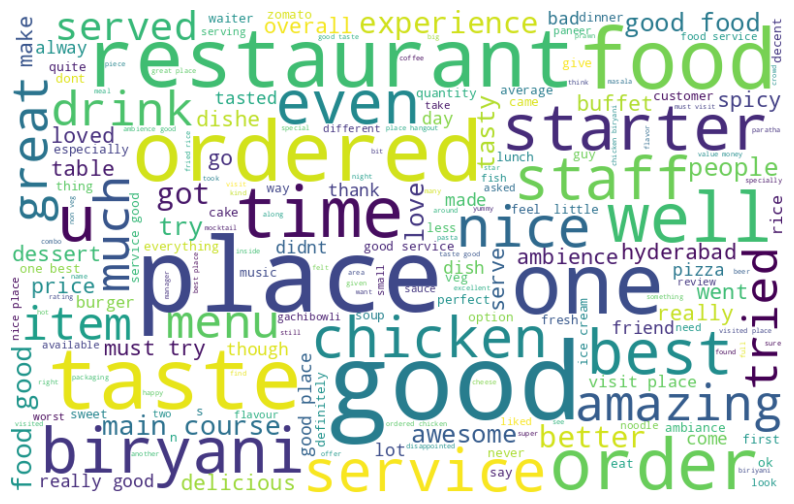

In [165]:
# Create a word cloud from the concatenated text of all reviews.
from wordcloud import WordCloud

# Define WordCloud parameters and generate the word cloud.
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=110)
wordcloud.generate(all_words)

# Display the word cloud.
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [166]:
#getting list of most used words in our data.
import collections
import re
words = re.findall(r'\w+', all_words)
most_common = collections.Counter(words).most_common(20)
most_common

[('good', 7007),
 ('food', 6488),
 ('place', 5663),
 ('service', 3157),
 ('chicken', 3045),
 ('taste', 2215),
 ('ordered', 2163),
 ('ambience', 2044),
 ('great', 1936),
 ('one', 1886),
 ('really', 1659),
 ('time', 1582),
 ('also', 1577),
 ('nice', 1464),
 ('like', 1451),
 ('best', 1433),
 ('biryani', 1305),
 ('staff', 1295),
 ('try', 1278),
 ('visit', 1255)]

In [167]:
# Convert the dictionary of most common words to lists of keys (words) and values (frequencies).
most_common_dict = dict(most_common)
x = list(most_common_dict.keys())
y = list(most_common_dict.values())

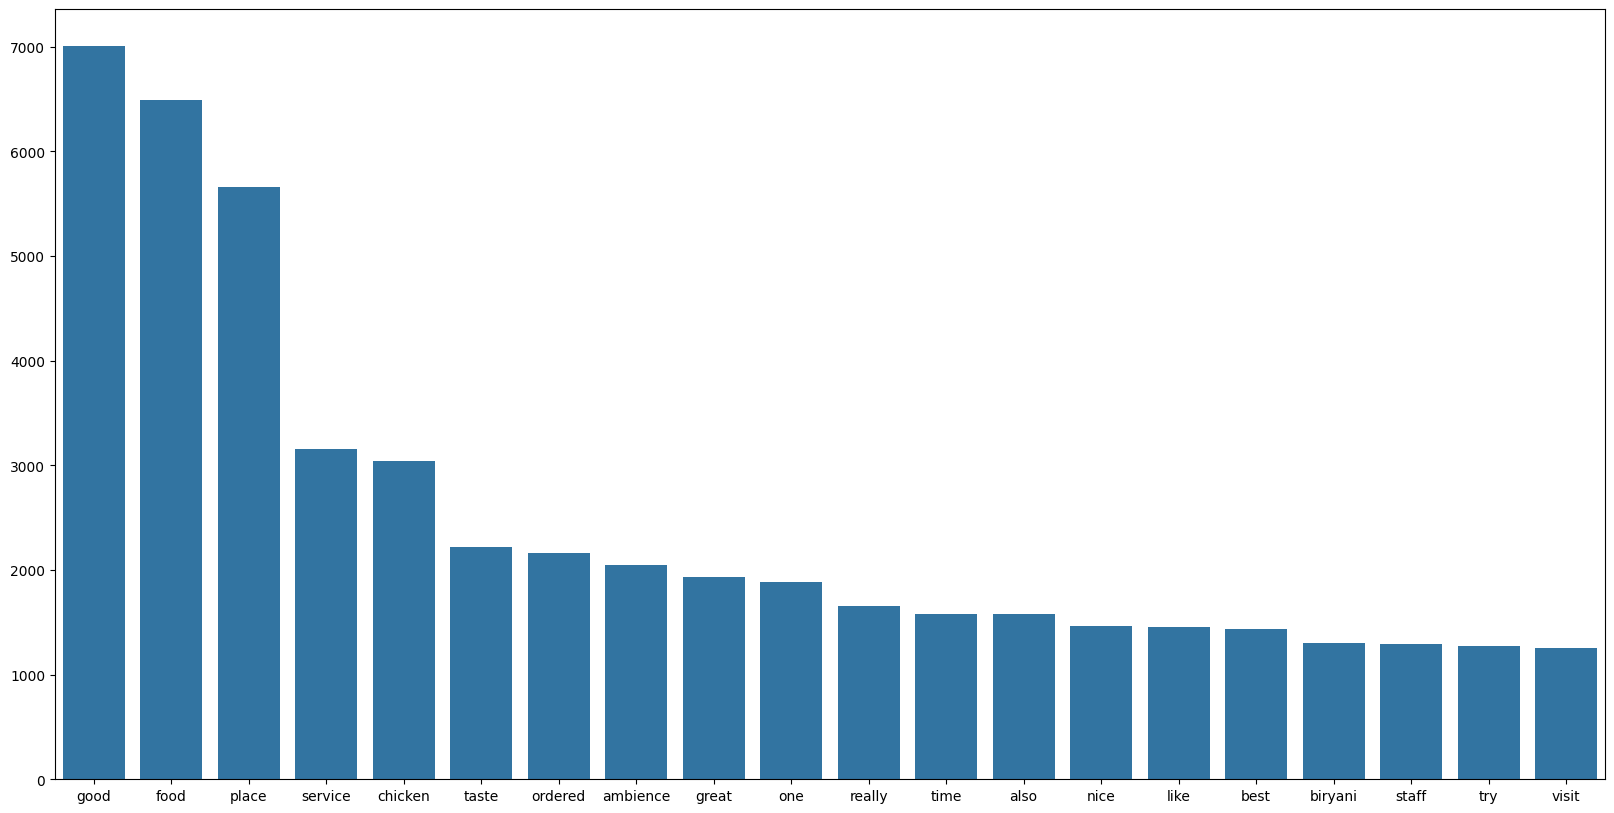

In [168]:
# Create a figure with size 20x10 inches.
plt.figure(figsize=(20, 10))

# Create a bar plot using seaborn's barplot function.
# Use the values in 'x' as the x-axis categories and the values in 'y' as their corresponding frequencies or values.
sns.barplot(x=x, y=y)

# Display the plot.
plt.show()

These are the Most used words in our Dataset.

### **A function for stemming operation**

In [169]:
# Import the SnowballStemmer class from the nltk.stem.snowball module.
from nltk.stem.snowball import SnowballStemmer

In [170]:
# Create an object of the SnowballStemmer for English.
stemmer = SnowballStemmer("english")

# Define a function 'stemming' to stem each word in the given text.
def stemming(text):
    '''A function which stems each word in the given text.'''
    # Split the text into words, stem each word using the SnowballStemmer, and join the stemmed words back into a single string.
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [171]:
# Apply the 'stemming' function to the 'Review' column of the DataFrame 'reviews_df'.
reviews_df['Review'] = reviews_df['Review'].apply(stemming)

In [172]:
# Display the top few rows of the reviews_df dataframe
reviews_df.head()

index       Restaurant              Reviewer  \
0      0  Beyond Flavours     Rusha Chakraborty   
1      1  Beyond Flavours  Anusha Tirumalaneedi   
2      2  Beyond Flavours       Ashok Shekhawat   
3      3  Beyond Flavours        Swapnil Sarkar   
4      4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  ambienc good food quit good saturday lunch cos...     5.0   
1  ambienc good pleasant even servic prompt food ...     5.0   
2  must tri great food great ambienc thnx servic ...     5.0   
3  soumen das arun great guy behavior sincereti g...     5.0   
4  food goodw order kodi drumstick basket mutton ...     5.0   

                 Time  Pictures  Reviews  Followers  Year  Month  Day  Hour  
0 2019-05-25 15:54:00         0        1        2.0  2019      5   25    15  
1 2019-05-25 14:20:00         0        3        2.0  2019      5   25    14  
2 2019-05-24 22:54:00         0        2        3.0  2019      5   24    22  
3 2019-05-24 22:11:00         0        1        1.0  2019      5   24    22  
4 2019-05-24 21:37:00         0        3        2.0  2019      5   24    21

### **Top words after stemming**

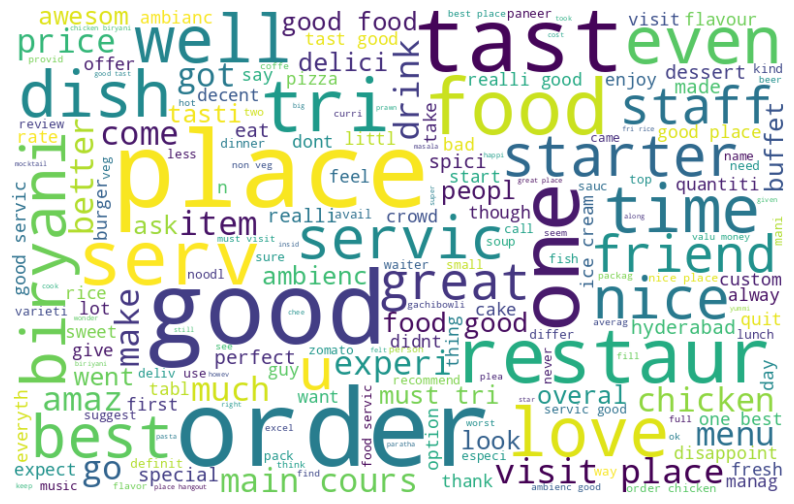

In [173]:
# Concatenate all reviews into a single string.
all_words = ' '.join([text for text in reviews_df['Review']])

# Import the WordCloud class from the wordcloud module.
from wordcloud import WordCloud

# Create a WordCloud object with specified parameters.
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=110)

# Generate the word cloud from the concatenated text.
wordcloud.generate(all_words)

# Display the word cloud.
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [174]:
# Import the 'collections' module for working with collections of data.
import collections
# Import the 're' module for regular expressions.
import re

# Use regular expression to find all words in the concatenated text.
words = re.findall(r'\w+', all_words)

# Use Counter to count the occurrence of each word and find the 20 most common words.
most_common = collections.Counter(words).most_common(20)
most_common

[('good', 7011),
 ('food', 6546),
 ('place', 6007),
 ('order', 3600),
 ('servic', 3246),
 ('chicken', 3046),
 ('tast', 2983),
 ('ambienc', 2045),
 ('time', 2041),
 ('tri', 2037),
 ('one', 1994),
 ('great', 1940),
 ('visit', 1875),
 ('like', 1816),
 ('realli', 1659),
 ('serv', 1592),
 ('also', 1577),
 ('nice', 1510),
 ('best', 1434),
 ('restaur', 1430)]

In [175]:
# Convert the list of most common words and their frequencies into a dictionary.
most_common_dict = dict(most_common)

# Extract the keys (words) and values (frequencies) from the dictionary.
x = list(most_common_dict.keys())
y = list(most_common_dict.values())

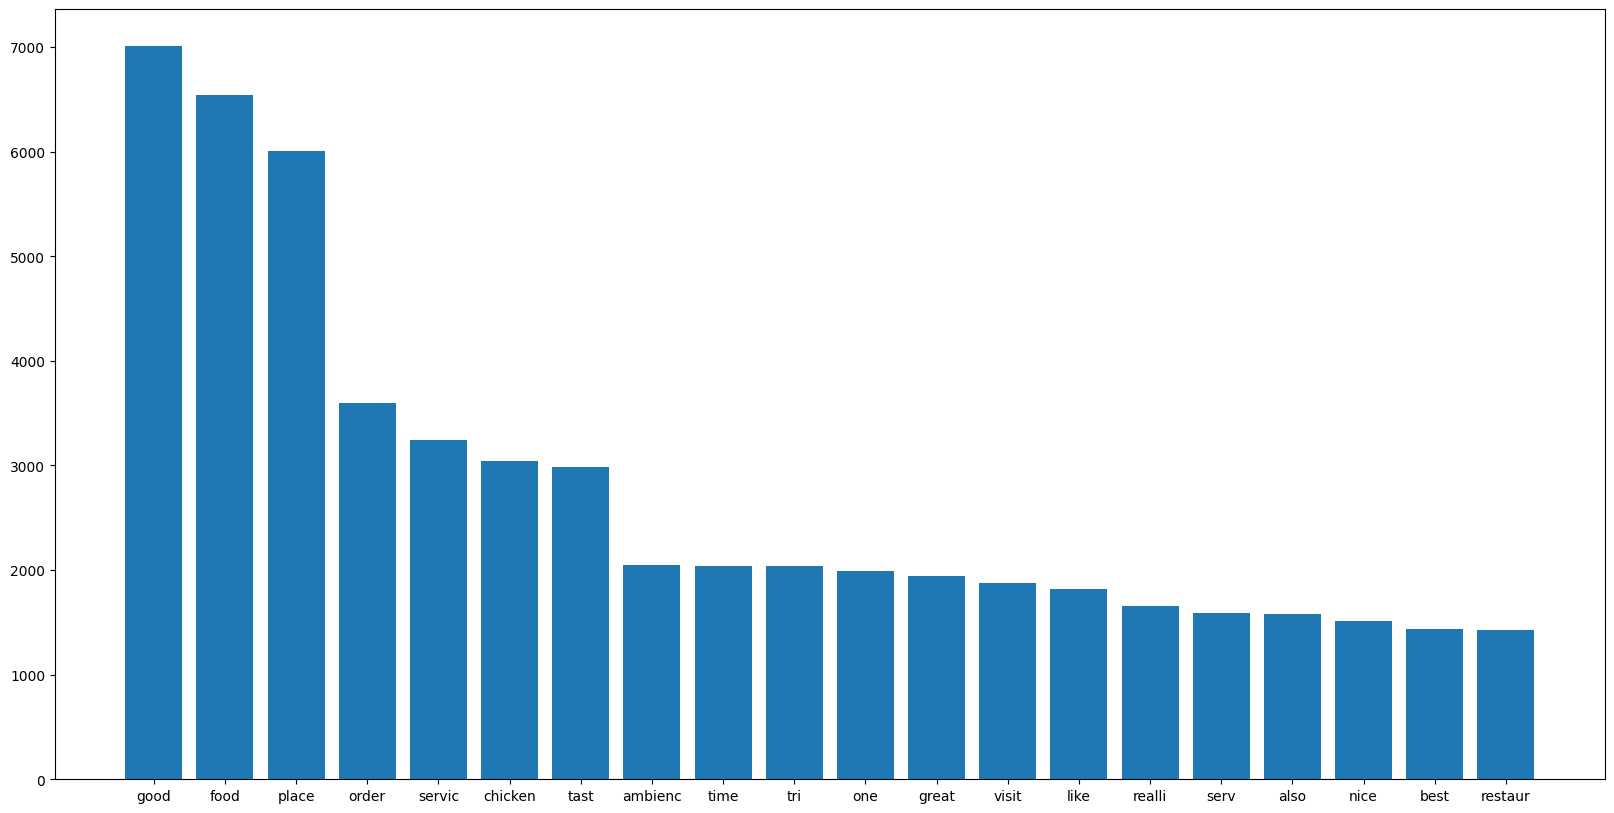

In [176]:
# Set the figure size for the plot.
plt.rcParams['figure.figsize'] = (20, 10)

# Create a bar plot using the specified x and y values.
plt.bar(x, y)

# Display the plot.
plt.show()

## **Feature Encoding**

In [177]:
# Define a function 'sentiment' to classify ratings into positive (0) or negative (1) sentiment.
def sentiment(rating):
    if rating >= 3.5:
        return 0  # Positive sentiment
    else:
        return 1  # Negative sentiment

In [178]:
# Apply the 'sentiment' function to the 'Rating' column of the DataFrame 'reviews_df' and store the results in a new column called 'sentiment'.
reviews_df['sentiment'] = reviews_df['Rating'].apply(sentiment)

In [179]:
# Count the occurrences of each sentiment value in the 'sentiment' column of the DataFrame 'reviews_df'.
reviews_df['sentiment'].value_counts()

0    6316
1    3639
Name: sentiment, dtype: int64

In [180]:
# Display the bottom 10 rows of reviews_df DataFrame
reviews_df.tail(10)

index        Restaurant                 Reviewer  \
9945   9990  Chinese Pavilion             Akram Ul Haq   
9946   9991  Chinese Pavilion  Krishna Teja Ratnakaram   
9947   9992  Chinese Pavilion               Sujay Garg   
9948   9993  Chinese Pavilion              Richard Rao   
9949   9994  Chinese Pavilion     Shiladitya Chaudhury   
9950   9995  Chinese Pavilion         Abhishek Mahajan   
9951   9996  Chinese Pavilion           Sharad Agrawal   
9952   9997  Chinese Pavilion                Ramandeep   
9953   9998  Chinese Pavilion          Nayana Shanbhag   
9954   9999  Chinese Pavilion         Bhargava Krishna   

                                                 Review  Rating  \
9945  amaz food alway go want chines food favourit c...     5.0   
9946  never fan chines food visit chines pavilionban...     5.0   
9947  visit restaur friend immedi blown away qualiti...     5.0   
9948  im go cut chase food excel must say honey chic...     5.0   
9949  chines pavilion banjara hill first chines rest...     1.5   
9950  madhumathi mahajan well start nice courteous s...     3.0   
9951  place never disappoint us food courteous staff...     4.5   
9952  bad rate main chicken bone found veg food acce...     1.5   
9953  person love prefer chines food coupl time husb...     4.0   
9954  check tri delici chines food seen nonveg lunch...     3.5   

                    Time  Pictures  Reviews  Followers  Year  Month  Day  \
9945 2016-06-16 13:53:00         0        3      128.0  2016      6   16   
9946 2016-06-15 00:50:00         0        9       54.0  2016      6   15   
9947 2016-06-15 00:04:00         0        4        1.0  2016      6   15   
9948 2016-06-14 18:35:00         0        3       74.0  2016      6   14   
9949 2016-06-05 10:49:00         0        6        3.0  2016      6    5   
9950 2016-06-05 00:08:00         0       53       54.0  2016      6    5   
9951 2016-06-04 22:01:00         0        2       53.0  2016      6    4   
9952 2016-06-03 10:37:00         3       65      423.0  2016      6    3   
9953 2016-05-31 17:22:00         0       13      144.0  2016      5   31   
9954 2016-05-31 16:41:00         6      472     1302.0  2016      5   31   

      Hour  sentiment  
9945    13          0  
9946     0          0  
9947     0          0  
9948    18          0  
9949    10          1  
9950     0          1  
9951    22          0  
9952    10          1  
9953    17          0  
9954    16          0

In [181]:
# Create a new DataFrame 'sentiment_df' containing only the 'Review' and 'sentiment' columns from the original DataFrame 'reviews_df'.
sentiment_df = reviews_df[['Review', 'sentiment']]

# Display the first few rows of the new DataFrame.
sentiment_df.head()

Review  sentiment
0  ambienc good food quit good saturday lunch cos...          0
1  ambienc good pleasant even servic prompt food ...          0
2  must tri great food great ambienc thnx servic ...          0
3  soumen das arun great guy behavior sincereti g...          0
4  food goodw order kodi drumstick basket mutton ...          0

In [182]:
# Creating our Dependent and independent variable.
X = sentiment_df['Review']
Y = sentiment_df['sentiment']

In [183]:
#importing CountVectorizer.
from sklearn.feature_extraction.text import CountVectorizer

In [184]:
#Applying CountVectorizer
cv =  CountVectorizer(max_features=5000)
X= cv .fit_transform(X).toarray()

In [185]:
# Display the independent variable
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [186]:
# Display the shape of independent variable
X.shape

(9955, 5000)

## **Model Building**



## Sentiment analysis superviesd

In [187]:
# Import the necessary functions for evaluating classification models from the sklearn.metrics module.
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, roc_auc_score

## **Train Test Split**

In [188]:
# Splitting the dataset into train and test data
from sklearn.model_selection import train_test_split

In [189]:
# Split the data into training and testing sets using train_test_split function from sklearn.model_selection module.
# Set the test_size parameter to 0.3, which means 30% of the data will be used for testing.
# Set the random_state parameter to 0 for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Print the shapes of the training and testing sets.
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (6968, 5000)
X_test.shape: (2987, 5000)
y_train.shape: (6968,)
y_test.shape: (2987,)


# **Decision Tree**

In [190]:
# Import the DecisionTreeClassifier from the sklearn.tree module.
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier with max_depth=4 and fit it to the training data.
dtree = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)

# Make predictions on the test data using the trained decision tree model.
dtree_predictions = dtree.predict(X_test)

# Calculate performance metrics: accuracy, precision, and recall.
dtree_accuracy = accuracy_score(dtree_predictions, y_test)
dtree_precision = precision_score(dtree_predictions, y_test)
dtree_recall = recall_score(dtree_predictions, y_test)

# Print the performance metrics of the Decision Tree Classifier.
print('Performance of Decision Tree Classifier')
print('Accuracy:', dtree_accuracy)
print('Precision:', dtree_precision)
print('Recall:', dtree_recall)

Performance of Decision Tree Classifier
Accuracy: 0.7328423167057249
Precision: 0.5311355311355311
Recall: 0.6697459584295612


In [191]:
# Calculate the Area Under the ROC Curve (AUC) for the Decision Tree Classifier.
dtree_auc_roc = roc_auc_score(dtree_predictions, y_test)

In [192]:
# Print the Area Under the ROC Curve (AUC) for the test set.
print('roc_auc_score for test set:', roc_auc_score(dtree_predictions, y_test))

roc_auc_score for test set: 0.71417519515066


In [193]:
# Print the classification report for the Decision Tree Classifier.
print('Classification Report:')
print(classification_report(dtree_predictions, y_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.76      0.80      2121
           1       0.53      0.67      0.59       866

    accuracy                           0.73      2987
   macro avg       0.69      0.71      0.70      2987
weighted avg       0.76      0.73      0.74      2987



# **Logistic Regression**

In [194]:
# Import the LogisticRegression class from the sklearn.linear_model module.
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model and fit it to the training data.
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the test data using the trained logistic regression model.
logreg_predictions = logreg.predict(X_test)

# Calculate performance metrics: accuracy, precision, and recall.
logreg_accuracy = accuracy_score(logreg_predictions, y_test)
logreg_precision = precision_score(logreg_predictions, y_test)
logreg_recall = recall_score(logreg_predictions, y_test)

# Print the performance metrics of the Logistic Regression model.
print('Performance of Logistic Regression')
print('Accuracy:', logreg_accuracy)
print('Precision:', logreg_precision)
print('Recall:', logreg_recall)

Performance of Logistic Regression
Accuracy: 0.8684298627385336
Precision: 0.7857142857142857
Recall: 0.8436578171091446


In [195]:
# Calculate the Area Under the ROC Curve (AUC) for the Logistic Regression model.
logreg_auc_roc = roc_auc_score(logreg_predictions, y_test)

In [196]:
# Print the Area Under the ROC Curve (AUC) for the test set.
print('roc_auc_score for test set:', roc_auc_score(logreg_predictions, y_test))

roc_auc_score for test set: 0.8624380456104098


In [197]:
# Print the classification report for the Logistic Regression model.
print('Classification Report:')
print(classification_report(logreg_predictions, y_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1970
           1       0.79      0.84      0.81      1017

    accuracy                           0.87      2987
   macro avg       0.85      0.86      0.86      2987
weighted avg       0.87      0.87      0.87      2987



# **KNN Classifier**

In [198]:
# Import the KNeighborsClassifier class from the sklearn.neighbors module.
from sklearn.neighbors import KNeighborsClassifier

# Create a K-Nearest Neighbors (KNN) classifier with 7 neighbors and fit it to the training data.
knn = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)

# Make predictions on the test data using the trained KNN classifier.
knn_predictions = knn.predict(X_test)

# Calculate performance metrics: accuracy, precision, and recall.
knn_accuracy = accuracy_score(knn_predictions, y_test)
knn_precision = precision_score(knn_predictions, y_test)
knn_recall = recall_score(knn_predictions, y_test)

# Print the performance metrics of the KNN classifier.
print('Performance of K-nearest neighbor Classifier')
print('Accuracy:', knn_accuracy)
print('Precision:', knn_precision)
print('Recall:', knn_recall)

Performance of K-nearest neighbor Classifier
Accuracy: 0.7556076330766656
Precision: 0.489010989010989
Recall: 0.7563739376770539


In [199]:
# Calculate the Area Under the ROC Curve (AUC) for the KNN classifier.
knn_auc_roc = roc_auc_score(knn_predictions, y_test)

In [200]:
# Print the Area Under the ROC Curve (AUC) for the test set using the KNN classifier.
print('roc_auc_score for test set:', roc_auc_score(knn_predictions, y_test))

roc_auc_score for test set: 0.7558721946166944


In [201]:
# Print the classification report for the KNN classifier.
print('Classification Report:')
print(classification_report(knn_predictions, y_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      2281
           1       0.49      0.76      0.59       706

    accuracy                           0.76      2987
   macro avg       0.70      0.76      0.71      2987
weighted avg       0.81      0.76      0.77      2987



# **Random Forest Clssifier**

In [202]:
# Import the RandomForestClassifier from the sklearn.ensemble module.
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier.
rcf = RandomForestClassifier()

# Fit the RandomForestClassifier to the training data.
rcf.fit(X_train, y_train)

# Predict the labels for the test set.
rcf_predictions = rcf.predict(X_test)

# Calculate the accuracy, precision, and recall for the RandomForestClassifier.
rcf_accuracy = accuracy_score(rcf_predictions, y_test)
rcf_precision = precision_score(rcf_predictions, y_test)
rcf_recall = recall_score(rcf_predictions, y_test)

# Print the performance metrics of the Random Forest classifier.
print('Performance of Random Forest Classifier')
print('Accuracy:', rcf_accuracy)
print('Precision:', rcf_precision)
print('Recall:', rcf_recall)

Performance of Random Forest Classifier
Accuracy: 0.8620689655172413
Precision: 0.7261904761904762
Recall: 0.8752759381898455


In [203]:
# Calculate the ROC AUC score for the Random Forest classifier.
rcf_auc_roc = roc_auc_score(rcf_predictions, y_test)

In [204]:
# Print the ROC AUC score for the test set.
print('roc_auc_score for test set : ', rcf_auc_roc)

roc_auc_score for test set :  0.8657975077782482


In [205]:
# Print the classification report for the Random Forest classifier.
print('Classification Report:')
print(classification_report(rcf_predictions, y_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      2081
           1       0.73      0.88      0.79       906

    accuracy                           0.86      2987
   macro avg       0.83      0.87      0.85      2987
weighted avg       0.88      0.86      0.87      2987



# **XGBoost Classifier**

In [206]:
# XGBoost Classifier
from xgboost import XGBClassifier

# Initialize and train the XGBoost classifier
xgbcf = XGBClassifier()
xgbcf.fit(X_train, y_train)

# Predictions
xgbcf_predictions = xgbcf.predict(X_test)

# Performance Metrics
xgbcf_accuracy = accuracy_score(xgbcf_predictions, y_test)
xgbcf_precision = precision_score(xgbcf_predictions, y_test)
xgbcf_recall = recall_score(xgbcf_predictions, y_test)

# Print the performance metrics for the XGBoost classifier
print('Performance of XGBoost classifier')
print('Accuracy :', xgbcf_accuracy)
print('Precision :', xgbcf_precision)
print('Recall :', xgbcf_recall)

Performance of XGBoost classifier
Accuracy : 0.8640776699029126
Precision : 0.7573260073260073
Recall : 0.8543388429752066


In [207]:
# Calculate the ROC AUC score for the XGBoost classifier
xgbcf_auc_roc = roc_auc_score(y_test, xgbcf.predict_proba(X_test)[:,1])

In [208]:
# Print the ROC AUC score for the XGBoost classifier
print('ROC AUC Score for test set:', roc_auc_score(y_test, xgbcf.predict_proba(X_test)[:,1]))

ROC AUC Score for test set: 0.9307482095740672


In [209]:
# Print the classification report for the XGBoost classifier
print('Classification Report:')
print(classification_report(xgbcf_predictions, y_test))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      2019
           1       0.76      0.85      0.80       968

    accuracy                           0.86      2987
   macro avg       0.84      0.86      0.85      2987
weighted avg       0.87      0.86      0.87      2987



# **Hyperparameter Tuning**

In [210]:
from sklearn.model_selection import GridSearchCV

## **Decision Tree**

In [211]:
#set the parmeter
param_grid = { 'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30] }

#fit the parameter
grid_dtree_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_dtree_clf.fit(X_train, y_train)

# Decision Tree Classifier
dtree_cv = grid_dtree_clf.best_estimator_


Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [212]:
#Decision Tree Predictions
dtree_cv_predictions= dtree_cv.predict(X_test)

#Performance Metrics
dtree_cv_accuracy= accuracy_score(dtree_cv_predictions,y_test)
dtree_cv_precision= precision_score(dtree_cv_predictions,y_test)
dtree_cv_recall= recall_score(dtree_cv_predictions,y_test)

print('Performance of Decision Tree classifier')
print('Accuracy :' ,dtree_cv_accuracy)
print('Precision :',dtree_cv_precision)
print('Recall :',dtree_cv_recall)

Performance of Decision Tree classifier
Accuracy : 0.7954469367258119
Precision : 0.7655677655677655
Recall : 0.7019311502938707


In [213]:
# Calculate the ROC AUC score for the Decision Tree classifier with cross-validation predictions
dtree_cv_auc_roc = roc_auc_score(dtree_cv_predictions, y_test)

In [214]:
# Print the ROC AUC score for the test set
print('roc_auc_score for test set:', roc_auc_score(dtree_cv_predictions, y_test))

roc_auc_score for test set: 0.7796960873963785


In [215]:
# Print the classification report
print('Classification Report:')
print(classification_report(dtree_cv_predictions, y_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1796
           1       0.77      0.70      0.73      1191

    accuracy                           0.80      2987
   macro avg       0.79      0.78      0.78      2987
weighted avg       0.79      0.80      0.79      2987



## **Logistic Regression**

In [216]:
#set the parmeter
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

#fit the parameter
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_lr_clf.fit(X_train, y_train)

# Logistic Regression Classifier
logreg_cv = grid_lr_clf.best_estimator_

Fitting 3 folds for each of 14 candidates, totalling 42 fits


In [217]:
#Logistic Regression Predictions
logreg_cv_predictions= logreg_cv.predict(X_test)

#Performance Metrics
logreg_cv_accuracy= accuracy_score(logreg_cv_predictions,y_test)
logreg_cv_precision= precision_score(logreg_cv_predictions,y_test)
logreg_cv_recall= recall_score(logreg_cv_predictions,y_test)

print('Performance of Logistic Regression classifier')
print('Accuracy :' ,logreg_cv_accuracy)
print('Precision :',logreg_cv_precision)
print('Recall :',logreg_cv_recall)

Performance of Logistic Regression classifier
Accuracy : 0.8751255440241045
Precision : 0.771978021978022
Recall : 0.8717683557394003


In [218]:
# Calculate the ROC AUC score for the Logistic Regression classifier with cross-validation predictions
rcf_cv_auc_roc = roc_auc_score(logreg_cv_predictions,y_test)

In [219]:
# Print the ROC AUC score for the test set
print('roc_auc_score for test set : ',roc_auc_score(logreg_cv_predictions,y_test))

roc_auc_score for test set :  0.8742505145033634


In [220]:
# Print the classification report
print('Classification Report:')
print(classification_report(logreg_cv_predictions,y_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      2020
           1       0.77      0.87      0.82       967

    accuracy                           0.88      2987
   macro avg       0.85      0.87      0.86      2987
weighted avg       0.88      0.88      0.88      2987



## **KNN Classifier**

In [221]:
#set the parmeter
param_grid = { 'n_neighbors': [3, 5, 7, 9, 11] } # Number of neighbors to consider

#fit the parameter
grid_knn_clf = GridSearchCV(KNeighborsClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_knn_clf.fit(X_train, y_train)

# K Nearest Neighbor Classifier
knn_cv = grid_knn_clf.best_estimator_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [222]:
# K Nearest Neighbors Predictions
knn_cv_predictions= knn_cv.predict(X_test)

#Performance Metrics
knn_cv_accuracy= accuracy_score(knn_cv_predictions,y_test)
knn_cv_precision= precision_score(knn_cv_predictions,y_test)
knn_cv_recall= recall_score(knn_cv_predictions,y_test)

print('Performance of KNearest Neighbors classifier')
print('Accuracy :' ,knn_cv_accuracy)
print('Precision :',knn_cv_precision)
print('Recall :',knn_cv_recall)

Performance of KNearest Neighbors classifier
Accuracy : 0.750920656176766
Precision : 0.4990842490842491
Recall : 0.7345013477088949


In [223]:
# Calculate the ROC AUC score for the KNN classifier with cross-validation predictions
rcf_cv_auc_roc = roc_auc_score(knn_cv_predictions,y_test)

In [224]:
# Print the ROC AUC score for the test set
print('roc_auc_score for test set : ',roc_auc_score(knn_cv_predictions,y_test))

roc_auc_score for test set :  0.7454243932308394


In [225]:
# Print the classification report
print('Classification Report:')
print(classification_report(knn_cv_predictions,y_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      2245
           1       0.50      0.73      0.59       742

    accuracy                           0.75      2987
   macro avg       0.70      0.75      0.71      2987
weighted avg       0.80      0.75      0.76      2987



## **Random Forest**

In [226]:
#set the parmeter
param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}

#fit the parameter
grid_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_rf_clf.fit(X_train, y_train)

#Random Forest Classifier
rcf_cv = grid_rf_clf.best_estimator_

Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [227]:
# Random Forest Predictions
rcf_cv_predictions= rcf_cv.predict(X_test)

#Performance Metrics
rcf_cv_accuracy= accuracy_score(rcf_cv_predictions,y_test)
rcf_cv_precision= precision_score(rcf_cv_predictions,y_test)
rcf_cv_recall= recall_score(rcf_cv_predictions,y_test)

print('Performance of Random Forest classifier')
print('Accuracy :' ,rcf_cv_accuracy)
print('Precision :',rcf_cv_precision)
print('Recall :',rcf_cv_recall)

Performance of Random Forest classifier
Accuracy : 0.841981921660529
Precision : 0.6117216117216118
Recall : 0.9329608938547486


In [228]:
# Calculate the ROC AUC score for the Random Forest classifier with cross-validation predictions
rcf_cv_auc_roc = roc_auc_score(rcf_cv_predictions,y_test)

In [229]:
# Print the ROC AUC score for the test set
print('roc_auc_score for test set : ',roc_auc_score(rcf_cv_predictions,y_test))

roc_auc_score for test set :  0.8731295002078674


In [230]:
# Print the Classification Report
print('Classification Report:')
print(classification_report(rcf_cv_predictions,y_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.81      0.89      2271
           1       0.61      0.93      0.74       716

    accuracy                           0.84      2987
   macro avg       0.79      0.87      0.81      2987
weighted avg       0.89      0.84      0.85      2987



## **XGBoost Classifier**

In [231]:
# Define the parameter grid for grid search
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

# Perform Grid Search
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27),
 param_grid = param_test1, scoring='accuracy',n_jobs=-1, cv=3, verbose = 2)
gsearch1.fit(X_train, y_train)

# Get the best parameter from the grid search
xgbcf_cv = gsearch1.best_estimator_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [232]:
#XGBoost Predictions
xgbcf_cv_predictions= xgbcf_cv.predict(X_test)

#Performance Metrics
xgbcf_cv_accuracy= accuracy_score(xgbcf_cv_predictions,y_test)
xgbcf_cv_precision= precision_score(xgbcf_cv_predictions,y_test)
xgbcf_cv_recall= recall_score(xgbcf_cv_predictions,y_test)

print('Performance of XGBoost classifier')
print('Accuracy :' ,xgbcf_cv_accuracy)
print('Precision :',xgbcf_cv_precision)
print('Recall :',xgbcf_cv_recall)

Performance of XGBoost classifier
Accuracy : 0.8640776699029126
Precision : 0.7811355311355311
Recall : 0.8362745098039216


In [233]:
# Calculate the ROC AUC score for the Random Forest classifier with cross-validation predictions
xgbcf_cv_auc_roc = roc_auc_score(xgbcf_cv_predictions,y_test)

In [234]:
# Print the ROC AUC score for the test set
print('roc_auc_score for test set : ',roc_auc_score(xgbcf_cv_predictions,y_test))

roc_auc_score for test set :  0.8573848400570193


In [235]:
# Print the Classification Report
print('Classification Report:')
print(classification_report(xgbcf_cv_predictions,y_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      1967
           1       0.78      0.84      0.81      1020

    accuracy                           0.86      2987
   macro avg       0.85      0.86      0.85      2987
weighted avg       0.87      0.86      0.87      2987



# **Comparision of Performance of all Models**

In [236]:
# Create a DataFrame to store model performance metrics
models = pd.DataFrame({
    'Model': ['Decision Tree', 'Logistic Regression', 'K Nearest Neighbour', 'Random Forest', 'XGBoost'],
    'Test accuracy': [dtree_accuracy, logreg_accuracy, knn_accuracy, rcf_accuracy, xgbcf_accuracy],
    'Precision': [dtree_precision, logreg_precision, knn_precision, rcf_precision, xgbcf_precision],
    'Recall': [dtree_recall, logreg_recall, knn_recall, rcf_recall, xgbcf_recall],
    'AUC-ROC Score': [dtree_auc_roc, logreg_auc_roc, knn_auc_roc, rcf_auc_roc, xgbcf_auc_roc]
})

# Sort the models based on test accuracy in descending order
models.sort_values(by='Test accuracy', ascending=False).reset_index(drop=True)

Model  Test accuracy  Precision    Recall  AUC-ROC Score
0  Logistic Regression       0.868430   0.785714  0.843658       0.862438
1              XGBoost       0.864078   0.757326  0.854339       0.930748
2        Random Forest       0.862069   0.726190  0.875276       0.865798
3  K Nearest Neighbour       0.755608   0.489011  0.756374       0.755872
4        Decision Tree       0.732842   0.531136  0.669746       0.714175

Observation:

We can see from above table that Logistic Regression have highest Test Accuracy and Precision. but Random Forest has highest auc-roc score.
From above observations we can say that Logistic Regression and Random Forest are our best Models.

# **Conclusion**

That's it! We reached the end of our exercise.Starting with loading the data so far we have done EDA, null values treatment, encoding of categorical columns, feature selection, and then model building.


*   For clustering, we have decided on 5 clusters after the Silhouette score plot and elbow plot where we used KMeans clustering algorithm.
*   For Sentiment Analysis  we have implemented five different models to predict the sentiment of Reviews. Logistic Regression, Random Forest Classifier, Decision Tree, K Nearest Neighbour and Xgboost Classifier.




*    Logistic Regression  and Random Forest model performed the best among them. In this way, we can explore more from various textual data and Reviews. Our models will try to predict the various sentiments correctly.







